**Import the necessary libraries**

In [1]:
# Import necessary libraries for Data Analysis and Visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import necessary libraries for Descriptive Analytic Techniques
from scipy.stats import variation
from statistics import quantiles
from numpy.lib.function_base import quantile
import scipy.stats as stats
import matplotlib.pyplot as pl

#Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#Regression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

#Evaluation Metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, mean_squared_error, r2_score

In [2]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/IoT Network Intrusion Dataset.csv')

In [3]:
# Display the first five rows of the dataset
data.head()

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,...,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,...,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/07/2019 01:24:48 AM,141,0,3,...,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,Anomaly,Scan,Scan Port OS
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,04/09/2019 03:58:17 AM,151,0,2,...,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,Anomaly,Mirai,Mirai-Hostbruteforceg
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/09/2019 01:41:18 AM,153,2,1,...,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,Anomaly,Mirai,Mirai-Hostbruteforceg


In [4]:
# Display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625783 entries, 0 to 625782
Data columns (total 86 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Flow_ID            625783 non-null  object 
 1   Src_IP             625783 non-null  object 
 2   Src_Port           625783 non-null  int64  
 3   Dst_IP             625783 non-null  object 
 4   Dst_Port           625783 non-null  int64  
 5   Protocol           625783 non-null  int64  
 6   Timestamp          625783 non-null  object 
 7   Flow_Duration      625783 non-null  int64  
 8   Tot_Fwd_Pkts       625783 non-null  int64  
 9   Tot_Bwd_Pkts       625783 non-null  int64  
 10  TotLen_Fwd_Pkts    625783 non-null  float64
 11  TotLen_Bwd_Pkts    625783 non-null  float64
 12  Fwd_Pkt_Len_Max    625783 non-null  float64
 13  Fwd_Pkt_Len_Min    625783 non-null  float64
 14  Fwd_Pkt_Len_Mean   625783 non-null  float64
 15  Fwd_Pkt_Len_Std    625783 non-null  float64
 16  Bw

****Data Cleaning:****

**Note: The target column is 'Category'**

In [5]:
# Removing irrelevant features
data.drop(['Flow_ID','Src_IP','Src_Port','Dst_IP','Dst_Port','Protocol','Timestamp','Flow_Byts/s','Flow_Pkts/s','Label','Sub_Cat'], axis=1, inplace=True)
data.head()

,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,...,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Cat
0,75,1,1,982.0,1430.0,982.0,982.0,982.0,0.000000,1430.0,...,0,0.0,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,Mirai
1,5310,1,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0,0.0,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,DoS
2,141,0,3,0.0,2806.0,0.0,0.0,0.0,0.000000,1388.0,...,0,0.0,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,Scan
3,151,0,2,0.0,2776.0,0.0,0.0,0.0,0.000000,1388.0,...,0,0.0,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,Mirai
4,153,2,1,886.0,420.0,452.0,434.0,443.0,12.727922,420.0,...,0,0.0,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,Mirai


In [6]:
# Display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625783 entries, 0 to 625782
Data columns (total 75 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Flow_Duration      625783 non-null  int64  
 1   Tot_Fwd_Pkts       625783 non-null  int64  
 2   Tot_Bwd_Pkts       625783 non-null  int64  
 3   TotLen_Fwd_Pkts    625783 non-null  float64
 4   TotLen_Bwd_Pkts    625783 non-null  float64
 5   Fwd_Pkt_Len_Max    625783 non-null  float64
 6   Fwd_Pkt_Len_Min    625783 non-null  float64
 7   Fwd_Pkt_Len_Mean   625783 non-null  float64
 8   Fwd_Pkt_Len_Std    625783 non-null  float64
 9   Bwd_Pkt_Len_Max    625783 non-null  float64
 10  Bwd_Pkt_Len_Min    625783 non-null  float64
 11  Bwd_Pkt_Len_Mean   625783 non-null  float64
 12  Bwd_Pkt_Len_Std    625783 non-null  float64
 13  Flow_IAT_Mean      625783 non-null  float64
 14  Flow_IAT_Std       625783 non-null  float64
 15  Flow_IAT_Max       625783 non-null  float64
 16  Fl

In [7]:
# Getting the number of instances and features
data.shape

(625783, 75)

In [8]:
# Getting the dimensions of the data frame
data.ndim

2

**Finding the duplicate data**

In [9]:
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
625778    False
625779     True
625780     True
625781    False
625782     True
Length: 625783, dtype: bool

In [10]:
data.duplicated().sum()

461557

In [11]:
# Numeber of rows before removing the duplicates
data.count()

Flow_Duration      625783
Tot_Fwd_Pkts       625783
Tot_Bwd_Pkts       625783
TotLen_Fwd_Pkts    625783
TotLen_Bwd_Pkts    625783
                    ...  
Idle_Mean          625783
Idle_Std           625783
Idle_Max           625783
Idle_Min           625783
Cat                625783
Length: 75, dtype: int64

In [12]:
current_index = data.index

# Display the current index
print(current_index)

RangeIndex(start=0, stop=625783, step=1)


**Handling the duplicate data**

In [13]:
data.drop_duplicates(ignore_index=True, inplace=True)

In [14]:
data.duplicated().sum()

0

In [15]:
# Numeber of rows after removing the duplicates
data.count()

Flow_Duration      164226
Tot_Fwd_Pkts       164226
Tot_Bwd_Pkts       164226
TotLen_Fwd_Pkts    164226
TotLen_Bwd_Pkts    164226
                    ...  
Idle_Mean          164226
Idle_Std           164226
Idle_Max           164226
Idle_Min           164226
Cat                164226
Length: 75, dtype: int64

In [16]:
current_index = data.index

# Display the current index
print(current_index)

RangeIndex(start=0, stop=164226, step=1)


**Finding the missing or null values**

In [17]:
# Finding the null values
data.isnull().sum()

Flow_Duration      0
Tot_Fwd_Pkts       0
Tot_Bwd_Pkts       0
TotLen_Fwd_Pkts    0
TotLen_Bwd_Pkts    0
                  ..
Idle_Mean          0
Idle_Std           0
Idle_Max           0
Idle_Min           0
Cat                0
Length: 75, dtype: int64

In [18]:
data.isnull().sum()[data.isnull().sum()!=0]

Series([], dtype: int64)

**Overview of the Data:**

In [19]:
# To peek at first five rows
data.head()

,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,...,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Cat
0,75,1,1,982.0,1430.0,982.0,982.0,982.0,0.000000,1430.0,...,0,0.0,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,Mirai
1,5310,1,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0,0.0,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,DoS
2,141,0,3,0.0,2806.0,0.0,0.0,0.0,0.000000,1388.0,...,0,0.0,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,Scan
3,151,0,2,0.0,2776.0,0.0,0.0,0.0,0.000000,1388.0,...,0,0.0,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,Mirai
4,153,2,1,886.0,420.0,452.0,434.0,443.0,12.727922,420.0,...,0,0.0,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,Mirai


In [20]:
# To peek at last five rows
data.tail(5)

,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,...,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Cat
164221,153,2,1,2896.0,1448.0,1448.0,1448.0,1448.0,0.0,1448.0,...,0,0.000000,0.00000,0.0,0.0,76.50,0.707107,77.0,76.0,Mirai
164222,236,11,1,352.0,32.0,32.0,32.0,32.0,0.0,32.0,...,0,1.666667,0.57735,2.0,1.0,57.75,111.500000,225.0,2.0,Mirai
164223,28,1,1,0.0,69.0,0.0,0.0,0.0,0.0,69.0,...,0,0.000000,0.00000,0.0,0.0,28.00,0.000000,28.0,28.0,Mirai
164224,277,1,1,18.0,18.0,18.0,18.0,18.0,0.0,18.0,...,0,0.000000,0.00000,0.0,0.0,277.00,0.000000,277.0,277.0,Mirai
164225,240,2,1,2776.0,1388.0,1388.0,1388.0,1388.0,0.0,1388.0,...,0,0.000000,0.00000,0.0,0.0,120.00,7.071068,125.0,115.0,Normal


In [21]:
# To identify the type of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164226 entries, 0 to 164225
Data columns (total 75 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Flow_Duration      164226 non-null  int64  
 1   Tot_Fwd_Pkts       164226 non-null  int64  
 2   Tot_Bwd_Pkts       164226 non-null  int64  
 3   TotLen_Fwd_Pkts    164226 non-null  float64
 4   TotLen_Bwd_Pkts    164226 non-null  float64
 5   Fwd_Pkt_Len_Max    164226 non-null  float64
 6   Fwd_Pkt_Len_Min    164226 non-null  float64
 7   Fwd_Pkt_Len_Mean   164226 non-null  float64
 8   Fwd_Pkt_Len_Std    164226 non-null  float64
 9   Bwd_Pkt_Len_Max    164226 non-null  float64
 10  Bwd_Pkt_Len_Min    164226 non-null  float64
 11  Bwd_Pkt_Len_Mean   164226 non-null  float64
 12  Bwd_Pkt_Len_Std    164226 non-null  float64
 13  Flow_IAT_Mean      164226 non-null  float64
 14  Flow_IAT_Std       164226 non-null  float64
 15  Flow_IAT_Max       164226 non-null  float64
 16  Fl

In [22]:
# Getting the dimensions of the data frame
data.ndim

2

In [23]:
# Getting the number of instances and features
data.shape

(164226, 75)

**Summary Statistics:**

Compute summary statistics for numerical columns:

In [24]:
# Summary statistics for numerical columns
data.describe()

,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,...,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
count,164226.000000,164226.000000,164226.000000,164226.000000,164226.000000,164226.000000,164226.000000,164226.000000,164226.000000,164226.000000,...,164226.000000,164226.0,164226.000000,164226.000000,164226.000000,164226.000000,164226.000000,164226.000000,164226.000000,164226.000000
mean,1310.317983,3.682584,1.526110,553.225409,685.861977,265.500907,187.363919,234.031477,48.388942,458.544737,...,3.453144,0.0,14.266460,1.345931,16.111511,13.115244,884.064876,185.846483,1097.931929,759.470236
std,6522.764560,7.844926,2.103856,1596.429963,2810.465121,519.097561,433.060497,464.001393,190.338417,636.662775,...,7.911355,0.0,132.114428,40.436624,172.910776,124.443694,3656.199989,2244.547124,5241.231635,3264.489761
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,78.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,34.000000,0.000000,71.000000,6.000000
50%,149.000000,1.000000,1.000000,64.000000,32.000000,32.000000,30.000000,32.000000,0.000000,32.000000,...,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,83.000000,0.752773,112.000000,74.000000
75%,298.000000,3.000000,2.000000,480.000000,1388.000000,32.000000,32.000000,32.000000,0.000000,1388.000000,...,3.000000,0.0,0.000000,0.000000,0.000000,0.000000,151.000000,13.435029,212.000000,126.000000
max,99984.000000,186.000000,560.000000,109846.000000,773284.000000,1464.000000,1464.000000,1464.000000,1032.375901,1464.000000,...,186.000000,0.0,9044.625000,8598.658250,26785.000000,6659.000000,99973.000000,67071.906623,99973.000000,99973.000000


Explore summary statistics for categorical columns:

In [25]:
# Count of each unique value in categorical columns ('Cat')
print(data.value_counts('Cat'))

Cat
Mirai                95548
Normal               26807
DoS                  20192
Scan                 11492
MITM ARP Spoofing    10187
dtype: int64


In [26]:
#count the number of Unique values (distinct) in categorical columns ('Cat')
print("The number of Unique values in categorical columns:\n")
print("'Cat' column:", data['Cat'].nunique())

The number of Unique values in categorical columns:

'Cat' column: 5


In [27]:
# Unique values in categorical columns ('Cat')
print("Unique values in categorical columns:\n")
print("'Cat' column:", data['Cat'].unique())

Unique values in categorical columns:

'Cat' column: ['Mirai' 'DoS' 'Scan' 'Normal' 'MITM ARP Spoofing']


Count the number of unique (distinct) values in each column of a dataset

In [28]:
# count the number of unique (distinct) values in each column of a dataset
data.nunique()

Flow_Duration      12670
Tot_Fwd_Pkts         116
Tot_Bwd_Pkts          42
TotLen_Fwd_Pkts     2479
TotLen_Bwd_Pkts     2612
                   ...  
Idle_Mean          17905
Idle_Std           24210
Idle_Max           11956
Idle_Min           10872
Cat                    5
Length: 75, dtype: int64

#Descriptive Analytic Techniques

**Numeric Measures**

**Measures of Central Tendency for Flow_Duration**

In [29]:
# Measures of Central Tendency for the Flow_Duration Column

# Calculate the mean (the average value) and the median (the middle value) of the "Flow_Duration" column
Flow_Duration_Tendency = data['Flow_Duration'].agg(['mean','median'])
print(Flow_Duration_Tendency)

mean      1310.317983
median     149.000000
Name: Flow_Duration, dtype: float64


**Measures of Central Tendency for Idle_Mean**

In [30]:
# Measures of Central Tendency for the Idle_Mean Column

# Calculate the mean (the average value) and the median (the middle value) of the "Idle_Mean" column
Idle_Mean_Tendency = data['Idle_Mean'].agg(['mean','median'])
print(Idle_Mean_Tendency)

mean      884.064876
median     83.000000
Name: Idle_Mean, dtype: float64


**Measures of Dispersion for Flow_Duration**

In [31]:
# Measures of Dispersion for the Flow_Duration Column

# Calculate the range of Flow_Duration
range_duration = data['Flow_Duration'].max() - data['Flow_Duration'].min()
print('Range of Flow Duration:', range_duration)

# Calculate the variance of Flow_Duration
variance_duration = data['Flow_Duration'].var()
print('Variance of Flow Duration:', variance_duration)

# Calculate the standard deviation of Flow_Duration
std_dev_duration = data['Flow_Duration'].std()
print("Standard Deviation of Flow Duration:", std_dev_duration)

Range of Flow Duration: 99984
Variance of Flow Duration: 42546457.49946497
Standard Deviation of Flow Duration: 6522.7645595609965


In [32]:
# Measures of Dispersion for the Flow_Duration Column

# Calculate the IQR (Interquartile Range) of Flow_Duration
Q1 = data['Flow_Duration'].quantile(0.25)   # represents the first quartile (25th percentile) of the "Flow_Duration" column.
Q3 = data['Flow_Duration'].quantile(0.75)    # represents the third quartile (75th percentile) of the "Flow_Duration" column.
IQR_duration = Q3 - Q1
print("IQR of Flow Duration:", IQR_duration)

# Calculate thresholds for identifying outliers
upper_outlier_threshold = Q3 + (1.5 * IQR_duration)
lower_outlier_threshold = Q1 - (1.5 * IQR_duration)

print("Upper Outlier Threshold:", upper_outlier_threshold)
print("Lower Outlier Threshold:", lower_outlier_threshold)

IQR of Flow Duration: 220.0
Upper Outlier Threshold: 628.0
Lower Outlier Threshold: -252.0


In [33]:
# Measures of Dispersion for the Flow_Duration Column

#  Coefficient of Variation
from scipy.stats import variation
CV_duration = variation(data['Flow_Duration'])
print("Coefficient of Variation for Flow Duration:", CV_duration)

Coefficient of Variation for Flow Duration: 4.977986097538553


**Measures of Dispersion for Idle_Mean**

In [34]:
# Measures of Dispersion for the Idle_Mean Column

# Calculate the range of Idle_Mean
range_Idle_Mean = data['Idle_Mean'].max() - data['Idle_Mean'].min()
print('Range of Idle Mean:', range_Idle_Mean)

# Calculate the variance of Idle_Mean
variance_Idle_Mean = data['Idle_Mean'].var()
print('Variance of Idle Mean:', variance_Idle_Mean)

# Calculate the standard deviation of Idle_Mean
std_dev_Idle_Mean = data['Idle_Mean'].std()
print("Standard Deviation of Idle Mean:", std_dev_Idle_Mean)

Range of Idle Mean: 99973.0
Variance of Idle Mean: 13367798.360496372
Standard Deviation of Idle Mean: 3656.1999891275605


In [35]:
# Measures of Dispersion for the Idle_Mean Column

# Calculate the IQR (Interquartile Range) of Idle_Mean
Q1 = data['Idle_Mean'].quantile(0.25)   # represents the first quartile (25th percentile) of the "Idle_Mean" column.
Q3 = data['Idle_Mean'].quantile(0.75)    # represents the third quartile (75th percentile) of the "Idle_Mean" column.
IQR_Idle_Mean = Q3 - Q1
print("IQR of Idle Mean:", IQR_Idle_Mean)

# Calculate thresholds for identifying outliers
upper_outlier_threshold_Idle_Mean = Q3 + (1.5 * IQR_Idle_Mean)
lower_outlier_threshold_Idle_Mean = Q1 - (1.5 * IQR_Idle_Mean)

print("Upper Outlier Threshold - Idle_Mean:", upper_outlier_threshold_Idle_Mean)
print("Lower Outlier Threshold - Idle_Mean:", lower_outlier_threshold_Idle_Mean)

IQR of Idle Mean: 117.0
Upper Outlier Threshold - Idle_Mean: 326.5
Lower Outlier Threshold - Idle_Mean: -141.5


In [36]:
# Measures of Dispersion for the Idle_Mean Column

#  Coefficient of Variation
from scipy.stats import variation
CV_Idle_Mean = variation(data['Idle_Mean'])
print("Coefficient of Variation for Idle_Mean:", CV_Idle_Mean)

Coefficient of Variation for Idle_Mean: 4.135656735599498


**Measures of Position for Flow_Duration**

In [37]:
# Measures of Position for the Flow_Duration Column

# Calculate percentiles
print("50th percentile of the Flow Duration data: ", np.percentile(data['Flow_Duration'], 50))
print("80th percentile of the Flow Duration data: ", np.percentile(data['Flow_Duration'], 80))

# Calculate quartiles
quartile_1_duration = np.percentile(data['Flow_Duration'], 25)
print("Quartile (Q1):", quartile_1_duration)
quartile_2_duration = np.percentile(data['Flow_Duration'], 50)
print("Quartile (Q2):", quartile_2_duration)
quartile_3_duration = np.percentile(data['Flow_Duration'], 75)
print("Quartile (Q3):", quartile_3_duration)
# Another way to calculate quartiles
quartiles_duration = data['Flow_Duration'].quantile([0.25,0.50,0.75])
print("Quartiles (Q1 ,Q2, Q3):")
print(quartiles_duration)

50th percentile of the Flow Duration data:  149.0
80th percentile of the Flow Duration data:  412.0
Quartile (Q1): 78.0
Quartile (Q2): 149.0
Quartile (Q3): 298.0
Quartiles (Q1 ,Q2, Q3):
0.25     78.0
0.50    149.0
0.75    298.0
Name: Flow_Duration, dtype: float64


In [38]:
# Measures of Position
# display the  Quartile for each numeric column in the dataset
data.quantile([0.25,0.50,0.70], numeric_only=True)

,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,...,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
0.25,78.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,34.0,0.000000,71.0,6.0
0.50,149.0,1.0,1.0,64.0,32.0,32.0,30.0,32.0,0.0,32.0,...,1.0,0.0,0.0,0.0,0.0,0.0,83.0,0.752773,112.0,74.0
0.70,263.0,3.0,2.0,288.0,1072.0,32.0,32.0,32.0,0.0,1024.0,...,3.0,0.0,0.0,0.0,0.0,0.0,132.0,6.379655,167.0,118.0


In [39]:
# Measures of Position for the Flow_Duration Column

# Calculate deciles
deciles_duration = np.percentile(data['Flow_Duration'], np.arange(0, 100, 10))

# Print the deciles
for i, decile_value in enumerate(deciles_duration, start=1):
    if i==1:
      print(f"The minimum value in the 'Flow_Duration' column is: {decile_value}")
    else:
      print(f"Decile {(i-1)*10}% of all 'Flow_Duration' column values: {decile_value}")

The minimum value in the 'Flow_Duration' column is: 0.0
Decile 10% of all 'Flow_Duration' column values: 33.0
Decile 20% of all 'Flow_Duration' column values: 73.0
Decile 30% of all 'Flow_Duration' column values: 90.0
Decile 40% of all 'Flow_Duration' column values: 128.0
Decile 50% of all 'Flow_Duration' column values: 149.0
Decile 60% of all 'Flow_Duration' column values: 177.0
Decile 70% of all 'Flow_Duration' column values: 263.0
Decile 80% of all 'Flow_Duration' column values: 412.0
Decile 90% of all 'Flow_Duration' column values: 2144.5


In [40]:
# Measures of Position for the Flow_Duration Column

# Calculate deciles for each data point in 'Flow_Duration'
deciles = pd.qcut(data['Flow_Duration'], q=10, labels=False)

print("Deciles for 'Flow_Duration' column:")
print(deciles)

Deciles for 'Flow_Duration' column:
0         2
1         9
2         4
3         5
4         5
         ..
164221    5
164222    6
164223    0
164224    7
164225    6
Name: Flow_Duration, Length: 164226, dtype: int64


In [41]:
# Calculate deciles using pandas.qcut for each data point in 'Flow_Duration'
df = data
df['decile Flow_Duration'] = pd.qcut(df['Flow_Duration'], q=10, labels=False)
df.head()

,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,...,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Cat,decile Flow_Duration
0,75,1,1,982.0,1430.0,982.0,982.0,982.0,0.000000,1430.0,...,0.0,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,Mirai,2
1,5310,1,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,DoS,9
2,141,0,3,0.0,2806.0,0.0,0.0,0.0,0.000000,1388.0,...,0.0,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,Scan,4
3,151,0,2,0.0,2776.0,0.0,0.0,0.0,0.000000,1388.0,...,0.0,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,Mirai,5
4,153,2,1,886.0,420.0,452.0,434.0,443.0,12.727922,420.0,...,0.0,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,Mirai,5


In [42]:
# Measures of Position for the Flow_Duration Column

# Calculate Z-scores for each data point in 'Flow_Duration'
Z_scores = stats.zscore(data['Flow_Duration'])

print("Z-scores for 'Flow_Duration' column:")
print(Z_scores)

Z-scores for 'Flow_Duration' column:
0        -0.189386
1         0.613190
2        -0.179268
3        -0.177735
4        -0.177428
            ...   
164221   -0.177428
164222   -0.164703
164223   -0.196592
164224   -0.158418
164225   -0.164090
Name: Flow_Duration, Length: 164226, dtype: float64


In [43]:
# Measures of Position for the Flow_Duration Column

#Z-scores
df['z-scores Flow_Duration']=Z_scores
df.head()

,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Cat,decile Flow_Duration,z-scores Flow_Duration
0,75,1,1,982.0,1430.0,982.0,982.0,982.0,0.000000,1430.0,...,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,Mirai,2,-0.189386
1,5310,1,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,DoS,9,0.613190
2,141,0,3,0.0,2806.0,0.0,0.0,0.0,0.000000,1388.0,...,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,Scan,4,-0.179268
3,151,0,2,0.0,2776.0,0.0,0.0,0.0,0.000000,1388.0,...,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,Mirai,5,-0.177735
4,153,2,1,886.0,420.0,452.0,434.0,443.0,12.727922,420.0,...,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,Mirai,5,-0.177428


**Measures of Position for Idle_Mean**

In [44]:
# Measures of Position for the Idle_Mean Column

# Calculate percentiles
print("50th percentile of the Idle Mean data: ", np.percentile(data['Idle_Mean'], 50))
print("80th percentile of the Idle Mean data: ", np.percentile(data['Idle_Mean'], 80))
print("75th percentile of the Idle Mean data: ", np.percentile(data['Idle_Mean'], 75))

# Calculate quartiles
quartile_1_Idle_Mean = np.percentile(data['Idle_Mean'], 25)
print("Quartile (Q1):", quartile_1_Idle_Mean)
quartile_2_Idle_Mean = np.percentile(data['Idle_Mean'], 50)
print("Quartile (Q2):", quartile_2_Idle_Mean)
quartile_3_Idle_Mean = np.percentile(data['Idle_Mean'], 75)
print("Quartile (Q3):", quartile_3_Idle_Mean)
# Another way to calculate quartiles
quartiles_Idle_Mean = data['Idle_Mean'].quantile([0.25,0.50,0.75])
print("Quartiles (Q1 ,Q2, Q3):")
print(quartiles_Idle_Mean)

50th percentile of the Idle Mean data:  83.0
80th percentile of the Idle Mean data:  186.0
75th percentile of the Idle Mean data:  151.0
Quartile (Q1): 34.0
Quartile (Q2): 83.0
Quartile (Q3): 151.0
Quartiles (Q1 ,Q2, Q3):
0.25     34.0
0.50     83.0
0.75    151.0
Name: Idle_Mean, dtype: float64


In [45]:
# Measures of Position for the Idle_Mean Column

# Calculate deciles
deciles_Idle_Mean = np.percentile(data['Idle_Mean'], np.arange(0, 100, 10))

# Print the deciles
for i, decile_value in enumerate(deciles_Idle_Mean, start=1):
    if i==1:
      print(f"The minimum value in the 'Idle_Mean' column is: {decile_value}")
    else:
      print(f"Decile {(i-1)*10}% of all 'Idle_Mean' column values: {decile_value}")

The minimum value in the 'Idle_Mean' column is: 0.0
Decile 10% of all 'Idle_Mean' column values: 4.428571428571427
Decile 20% of all 'Idle_Mean' column values: 14.0
Decile 30% of all 'Idle_Mean' column values: 71.0
Decile 40% of all 'Idle_Mean' column values: 75.0
Decile 50% of all 'Idle_Mean' column values: 83.0
Decile 60% of all 'Idle_Mean' column values: 113.0
Decile 70% of all 'Idle_Mean' column values: 132.0
Decile 80% of all 'Idle_Mean' column values: 186.0
Decile 90% of all 'Idle_Mean' column values: 1913.5


In [46]:
# Measures of Position for the Idle_Mean Column

# Calculate deciles for each data point in 'Idle_Mean'
deciles_Idle_Mean = pd.qcut(data['Idle_Mean'], q=10, labels=False)

print("Deciles for 'Idle_Mean' column:")
print(deciles_Idle_Mean)

Deciles for 'Idle_Mean' column:
0         3
1         9
2         2
3         7
4         4
         ..
164221    4
164222    2
164223    2
164224    8
164225    6
Name: Idle_Mean, Length: 164226, dtype: int64


In [47]:
# Calculate deciles using pandas.qcut for each data point in 'Idle_Mean'
df = data
df['decile Idle_Mean'] = pd.qcut(df['Idle_Mean'], q=10, labels=False)
df.head()

,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,...,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Cat,decile Flow_Duration,z-scores Flow_Duration,decile Idle_Mean
0,75,1,1,982.0,1430.0,982.0,982.0,982.0,0.000000,1430.0,...,0.0,0.0,75.0,0.000000,75.0,75.0,Mirai,2,-0.189386,3
1,5310,1,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,DoS,9,0.613190,9
2,141,0,3,0.0,2806.0,0.0,0.0,0.0,0.000000,1388.0,...,0.0,0.0,70.5,0.707107,71.0,70.0,Scan,4,-0.179268,2
3,151,0,2,0.0,2776.0,0.0,0.0,0.0,0.000000,1388.0,...,0.0,0.0,151.0,0.000000,151.0,151.0,Mirai,5,-0.177735,7
4,153,2,1,886.0,420.0,452.0,434.0,443.0,12.727922,420.0,...,0.0,0.0,76.5,0.707107,77.0,76.0,Mirai,5,-0.177428,4


In [48]:
# Measures of Position for the Idle_Mean Column

# Calculate Z-scores for each data point in 'Idle_Mean'
Z_scores_Idle_Mean = stats.zscore(data['Idle_Mean'])

print("Z-scores for 'Idle_Mean' column:")
print(Z_scores_Idle_Mean)

Z-scores for 'Idle_Mean' column:
0        -0.221286
1         0.484366
2        -0.222517
3        -0.200500
4        -0.220876
            ...   
164221   -0.220876
164222   -0.226004
164223   -0.234141
164224   -0.166038
164225   -0.208979
Name: Idle_Mean, Length: 164226, dtype: float64


In [49]:
# Measures of Position for the Idle_Mean Column

#Z-scores
df['z-scores Idle_Mean']=Z_scores_Idle_Mean
df.head()

,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,...,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Cat,decile Flow_Duration,z-scores Flow_Duration,decile Idle_Mean,z-scores Idle_Mean
0,75,1,1,982.0,1430.0,982.0,982.0,982.0,0.000000,1430.0,...,0.0,75.0,0.000000,75.0,75.0,Mirai,2,-0.189386,3,-0.221286
1,5310,1,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,2655.0,2261.327486,4254.0,1056.0,DoS,9,0.613190,9,0.484366
2,141,0,3,0.0,2806.0,0.0,0.0,0.0,0.000000,1388.0,...,0.0,70.5,0.707107,71.0,70.0,Scan,4,-0.179268,2,-0.222517
3,151,0,2,0.0,2776.0,0.0,0.0,0.0,0.000000,1388.0,...,0.0,151.0,0.000000,151.0,151.0,Mirai,5,-0.177735,7,-0.200500
4,153,2,1,886.0,420.0,452.0,434.0,443.0,12.727922,420.0,...,0.0,76.5,0.707107,77.0,76.0,Mirai,5,-0.177428,4,-0.220876


**Outlier detections**

**Z-score method for Flow_Duration**

In [50]:
# Outlier detections

# Identify outliers in the Flow_Duration column / Z-score method:
Z_Outliers = df[(df['z-scores Flow_Duration']>3) | (df['z-scores Flow_Duration']<-3)]
Z_Outliers

,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,...,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Cat,decile Flow_Duration,z-scores Flow_Duration,decile Idle_Mean,z-scores Idle_Mean
15,60431,5,7,5680.0,1097.0,1388.0,1041.0,1136.000000,144.461067,1097.0,...,121.0,9708.333333,16525.220152,43394.0,1394.0,DoS,9,9.063774,9,2.413515
316,39659,0,2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,39659.000000,0.000000,39659.0,39659.0,DoS,9,5.879225,9,10.605288
346,84362,2,5,1810.0,981.0,905.0,905.0,905.000000,0.000000,981.0,...,415.0,27667.333333,21649.140406,44523.0,3252.0,DoS,9,12.732628,9,7.325461
354,46189,2,2,2528.0,0.0,1400.0,1128.0,1264.000000,192.333044,0.0,...,0.0,15396.333333,21528.961896,40225.0,1910.0,DoS,9,6.880337,9,3.969234
817,54508,3,5,3491.0,977.0,1257.0,977.0,1163.666667,161.658075,977.0,...,740.0,12997.000000,17175.757780,37893.0,1067.0,DoS,9,8.155720,9,3.312995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163960,74508,2,2,0.0,2214.0,0.0,0.0,0.000000,0.000000,1424.0,...,0.0,24836.000000,37810.332173,68493.0,2594.0,DoS,9,11.221914,9,6.551066
164026,89034,47,1,65262.0,1448.0,1448.0,456.0,1388.553191,216.915412,1448.0,...,90.0,9397.555556,8999.836875,25069.0,1064.0,DoS,9,13.448891,9,2.328515
164157,27602,0,2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,27602.000000,0.000000,27602.0,27602.0,DoS,9,4.030770,9,7.307592
164165,76146,8,16,272.0,7040.0,40.0,32.0,34.000000,3.703280,985.0,...,489.0,14341.800000,18595.552525,42137.0,1104.0,DoS,9,11.473036,9,3.680810


**Z-score method for Idle_Mean**

In [51]:
# Outlier detections

# Identify outliers in the Idle_Mean column / Z-score method:
Z_Outliers_Idle_Mean = df[(df['z-scores Idle_Mean']>3) | (df['z-scores Idle_Mean']<-3)]
Z_Outliers_Idle_Mean

,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,...,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Cat,decile Flow_Duration,z-scores Flow_Duration,decile Idle_Mean,z-scores Idle_Mean
66,13406,0,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,13406.000000,0.000000,13406.0,13406.0,DoS,9,1.854385,9,3.424860
259,12664,0,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,12664.000000,0.000000,12664.0,12664.0,DoS,9,1.740630,9,3.221916
316,39659,0,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,39659.000000,0.000000,39659.0,39659.0,DoS,9,5.879225,9,10.605288
346,84362,2,5,1810.0,981.0,905.0,905.0,905.0,0.000000,981.0,...,415.0,27667.333333,21649.140406,44523.0,3252.0,DoS,9,12.732628,9,7.325461
354,46189,2,2,2528.0,0.0,1400.0,1128.0,1264.0,192.333044,0.0,...,0.0,15396.333333,21528.961896,40225.0,1910.0,DoS,9,6.880337,9,3.969234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163943,68230,2,1,2180.0,0.0,1400.0,780.0,1090.0,438.406204,0.0,...,0.0,34115.000000,44496.815527,65579.0,2651.0,DoS,9,10.259436,9,9.088955
163960,74508,2,2,0.0,2214.0,0.0,0.0,0.0,0.000000,1424.0,...,0.0,24836.000000,37810.332173,68493.0,2594.0,DoS,9,11.221914,9,6.551066
164068,11862,0,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,11862.000000,0.000000,11862.0,11862.0,DoS,9,1.617675,9,3.002562
164157,27602,0,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,27602.000000,0.000000,27602.0,27602.0,DoS,9,4.030770,9,7.307592


**Interquartile range (IQR) method for Flow_Duration**

In [52]:
# Outlier detections

# Calculate thresholds for identifying outliers
upper_outlier_threshold = Q3 + (1.5 * IQR_duration)
lower_outlier_threshold = Q1 - (1.5 * IQR_duration)

print("Upper Outlier Threshold:", upper_outlier_threshold)
print("Lower Outlier Threshold:", lower_outlier_threshold)

Upper Outlier Threshold: 481.0
Lower Outlier Threshold: -296.0


In [53]:
# Outlier detections

# Identify outliers in the Flow_Duration column / IQR method:
IQR_outliers = data[(data['Flow_Duration'] > upper_outlier_threshold) | (data['Flow_Duration'] < lower_outlier_threshold)]

IQR_outliers

,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,...,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Cat,decile Flow_Duration,z-scores Flow_Duration,decile Idle_Mean,z-scores Idle_Mean
1,5310,1,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,2655.000000,2261.327486,4254.0,1056.0,DoS,9,0.613190,9,0.484366
9,6799,0,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,6799.000000,0.000000,6799.0,6799.0,DoS,9,0.841468,9,1.617787
15,60431,5,7,5680.0,1097.0,1388.0,1041.0,1136.0,144.461067,1097.0,...,121.0,9708.333333,16525.220152,43394.0,1394.0,DoS,9,9.063774,9,2.413515
38,4125,5,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,1803.0,2322.000000,0.000000,2322.0,2322.0,DoS,9,0.431518,9,0.393288
66,13406,0,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,13406.000000,0.000000,13406.0,13406.0,DoS,9,1.854385,9,3.424860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164189,6860,0,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,6860.000000,0.000000,6860.0,6860.0,DoS,9,0.850820,9,1.634471
164204,89234,8,9,280.0,4601.0,40.0,20.0,35.0,9.258201,1065.0,...,401.0,8538.100000,11516.658548,30802.0,1077.0,DoS,9,13.479553,9,2.093446
164205,509,0,2,0.0,1388.0,0.0,0.0,0.0,0.000000,1388.0,...,0.0,509.000000,0.000000,509.0,509.0,Normal,8,-0.122850,8,-0.102584
164211,6065,0,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,6065.000000,0.000000,6065.0,6065.0,DoS,9,0.728939,9,1.417032


**Interquartile range (IQR) method for Idle_Mean**

In [54]:
# Outlier detections

# Calculate thresholds for identifying outliers
upper_outlier_threshold_Idle_Mean = Q3 + (1.5 * IQR_Idle_Mean)
lower_outlier_threshold_Idle_Mean = Q1 - (1.5 * IQR_Idle_Mean)

print("Upper Outlier Threshold:", upper_outlier_threshold_Idle_Mean)
print("Lower Outlier Threshold:", lower_outlier_threshold_Idle_Mean)

Upper Outlier Threshold: 326.5
Lower Outlier Threshold: -141.5


In [55]:
# Outlier detections

# Identify outliers in the Idle_Mean column / IQR method:
IQR_outliers_Idle_Mean = data[(data['Idle_Mean'] > upper_outlier_threshold_Idle_Mean) | (data['Idle_Mean'] < lower_outlier_threshold_Idle_Mean)]

IQR_outliers_Idle_Mean

,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,...,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Cat,decile Flow_Duration,z-scores Flow_Duration,decile Idle_Mean,z-scores Idle_Mean
1,5310,1,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,2655.000000,2261.327486,4254.0,1056.0,DoS,9,0.613190,9,0.484366
9,6799,0,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,6799.000000,0.000000,6799.0,6799.0,DoS,9,0.841468,9,1.617787
15,60431,5,7,5680.0,1097.0,1388.0,1041.0,1136.0,144.461067,1097.0,...,121.0,9708.333333,16525.220152,43394.0,1394.0,DoS,9,9.063774,9,2.413515
38,4125,5,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,1803.0,2322.000000,0.000000,2322.0,2322.0,DoS,9,0.431518,9,0.393288
48,367,0,2,0.0,1388.0,0.0,0.0,0.0,0.000000,1388.0,...,0.0,367.000000,0.000000,367.0,367.0,Normal,7,-0.144620,8,-0.141422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164189,6860,0,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,6860.000000,0.000000,6860.0,6860.0,DoS,9,0.850820,9,1.634471
164204,89234,8,9,280.0,4601.0,40.0,20.0,35.0,9.258201,1065.0,...,401.0,8538.100000,11516.658548,30802.0,1077.0,DoS,9,13.479553,9,2.093446
164205,509,0,2,0.0,1388.0,0.0,0.0,0.0,0.000000,1388.0,...,0.0,509.000000,0.000000,509.0,509.0,Normal,8,-0.122850,8,-0.102584
164211,6065,0,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,6065.000000,0.000000,6065.0,6065.0,DoS,9,0.728939,9,1.417032



**Visual inspection for Flow_Duration Column**

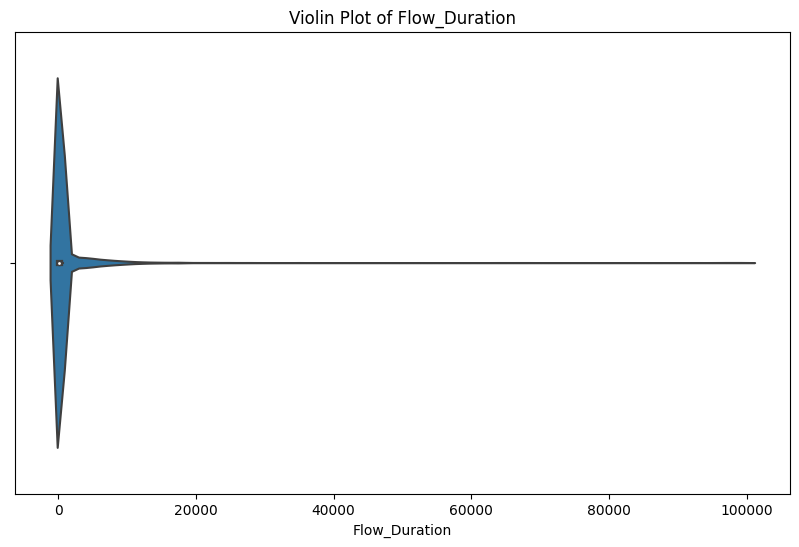

In [56]:
# Outlier detections / Visual inspection

# Create a violin plot for Flow_Duration
plt.figure(figsize=(10, 6))
sns.violinplot(x=data['Flow_Duration'], inner="box")
plt.title('Violin Plot of Flow_Duration')
plt.xlabel('Flow_Duration')
plt.show()


<Axes: >

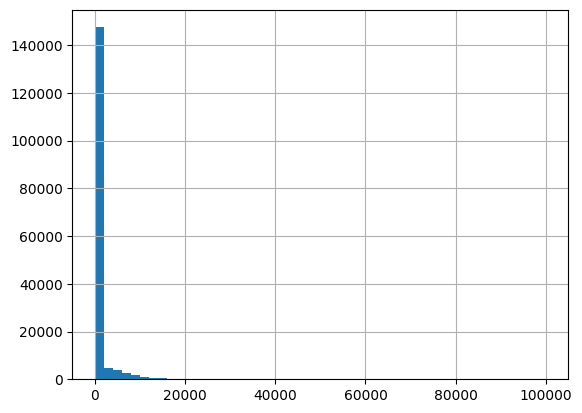

In [57]:
# Outlier detections / Visual inspection

# histogram chart
data['Flow_Duration'].hist(bins=50)

 Box plot

<Axes: xlabel='Flow_Duration'>

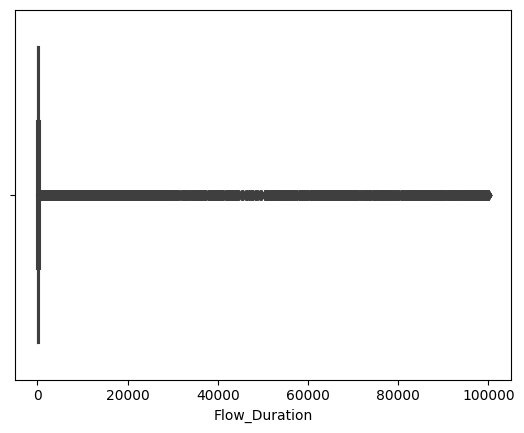

In [58]:
# Outlier detections / Box plot

sns.boxplot(x=data['Flow_Duration'])

 Density plot

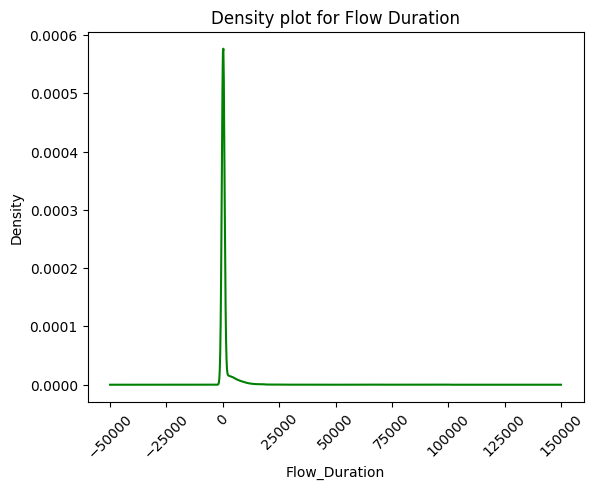

In [59]:
# Outlier detections / Density plot

data['Flow_Duration'].plot.density(color='green')  # Density Plot
plt.title('Density plot for Flow Duration')
plt.xlabel('Flow_Duration')
plt.ylabel('Density')
plt.xticks(rotation=45)
plt.show()

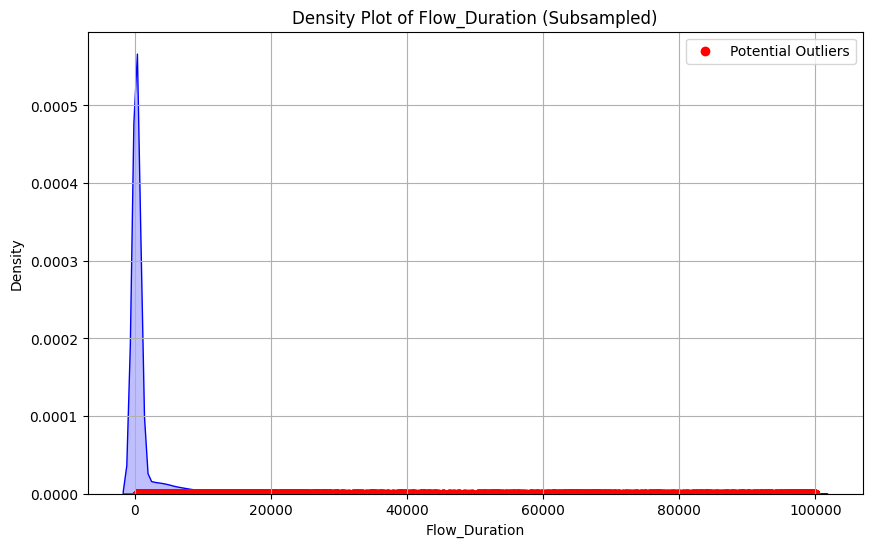

In [60]:
# Outlier detections / Density plot

# Create a density plot for Flow_Duration
plt.figure(figsize=(10, 6))
sns.kdeplot(data['Flow_Duration'], color='blue', fill=True)
plt.title('Density Plot of Flow_Duration (Subsampled)')
plt.xlabel('Flow_Duration')
plt.grid(True)

# Visualize potential outliers (customize the threshold)
potential_outliers = data[(data['Flow_Duration'] > upper_outlier_threshold) | (data['Flow_Duration'] < lower_outlier_threshold)]
plt.scatter(potential_outliers['Flow_Duration'], [0] * len(potential_outliers), color='red', marker='o', label='Potential Outliers')
plt.legend()

plt.show()


**Visual inspection for Idle_Mean Column**

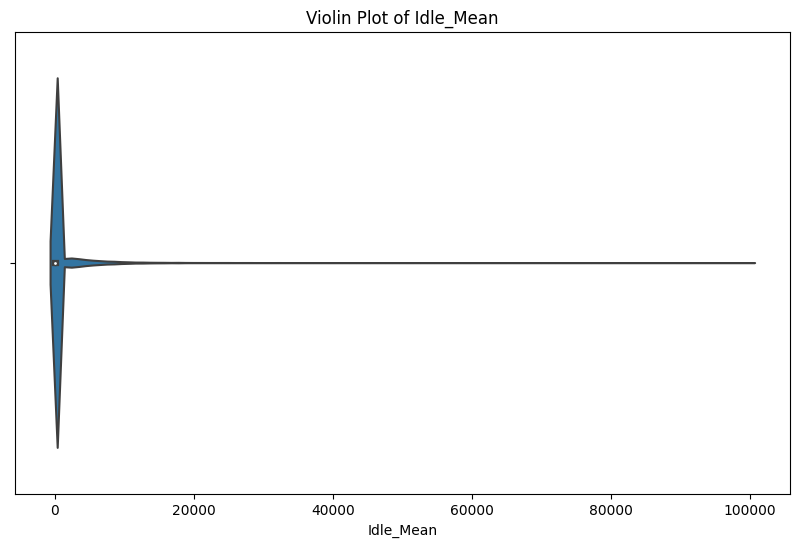

In [61]:
# Outlier detections / Visual inspection

# Create a violin plot for Idle_Mean
plt.figure(figsize=(10, 6))
sns.violinplot(x=data['Idle_Mean'], inner="box")
plt.title('Violin Plot of Idle_Mean')
plt.xlabel('Idle_Mean')
plt.show()

<Axes: >

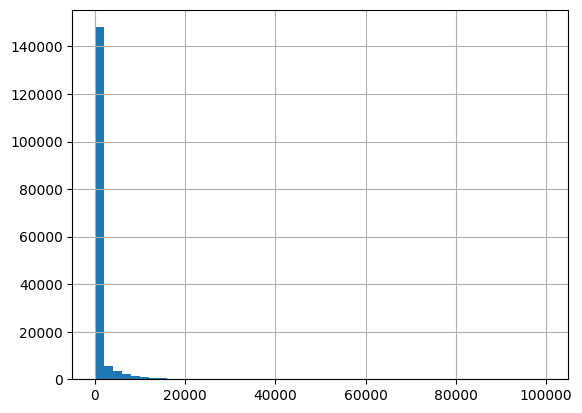

In [62]:
# Outlier detections / Visual inspection

# histogram chart
data['Idle_Mean'].hist(bins=50)

<Axes: xlabel='Idle_Mean'>

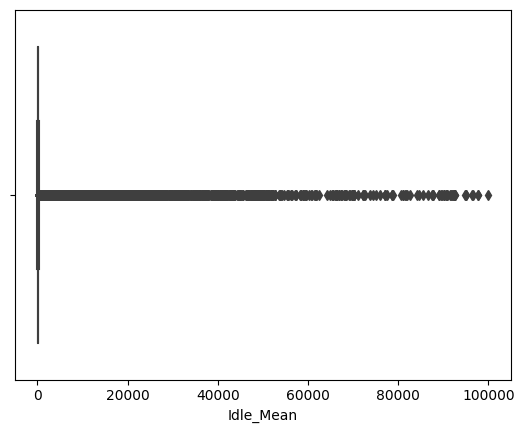

In [63]:
# Outlier detections / Box plot

sns.boxplot(x=data['Idle_Mean'])

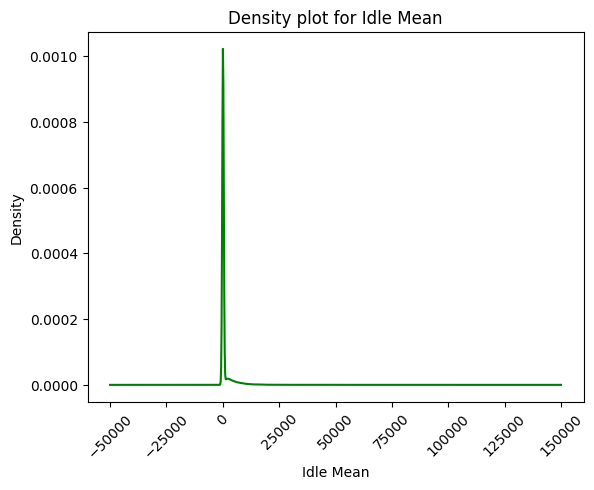

In [64]:
# Outlier detections / Density plot

data['Idle_Mean'].plot.density(color='green')  # Density Plot
plt.title('Density plot for Idle Mean')
plt.xlabel('Idle Mean')
plt.ylabel('Density')
plt.xticks(rotation=45)
plt.show()

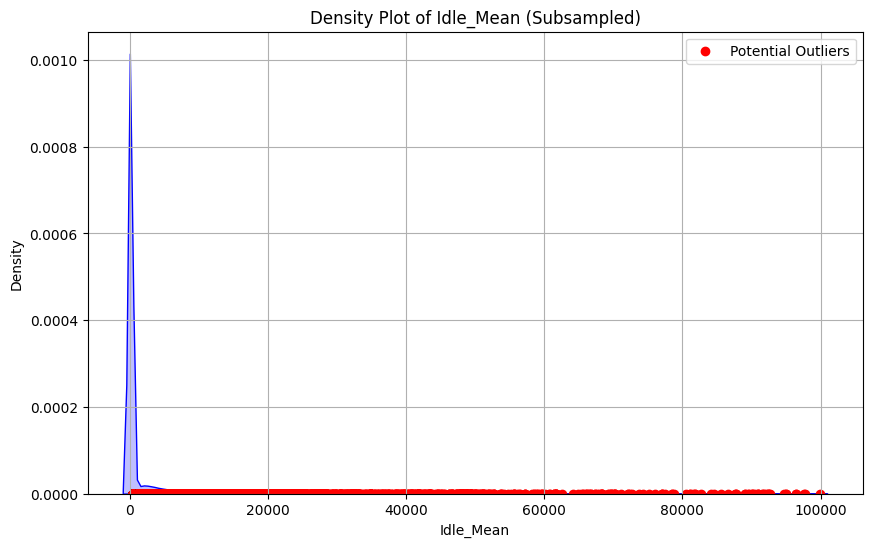

In [65]:
# Outlier detections / Density plot

# Create a density plot for Idle_Mean
plt.figure(figsize=(10, 6))
sns.kdeplot(data['Idle_Mean'], color='blue', fill=True)
plt.title('Density Plot of Idle_Mean (Subsampled)')
plt.xlabel('Idle_Mean')
plt.grid(True)

# Visualize potential outliers (customize the threshold)
potential_outliers = data[(data['Idle_Mean'] > upper_outlier_threshold) | (data['Idle_Mean'] < lower_outlier_threshold)]
plt.scatter(potential_outliers['Idle_Mean'], [0] * len(potential_outliers), color='red', marker='o', label='Potential Outliers')
plt.legend()

plt.show()

**Descriptive Analytic Techniques / Numerical Columns**

In [66]:
# Define the columns and their Measures
Measures = [
    ('Central Tendency (Mean)', Flow_Duration_Tendency[0], Idle_Mean_Tendency[0]),
    ('Central Tendency (Median)', Flow_Duration_Tendency[1], Idle_Mean_Tendency[1]),
    ('Dispersion (Range)', range_duration, range_Idle_Mean),
    ('Dispersion (Variance)', variance_duration, variance_Idle_Mean),
    ('Dispersion (Standard Deviation)', std_dev_duration, std_dev_Idle_Mean),
    ('Dispersion (Interquartile Range)', IQR_duration, IQR_Idle_Mean),
    ('Dispersion (Coefficient of Variation)', CV_duration, CV_Idle_Mean),
    ('Position (Quartile (Q1))', quartile_1_duration, quartile_1_Idle_Mean),
    ('Position (Quartile (Q3))', quartile_3_duration, quartile_3_Idle_Mean),
    ('Position (Quartile (Q2))', quartile_2_duration, quartile_2_Idle_Mean)
]

# Create a DataFrame
df_Measures = pd.DataFrame(Measures, columns=['Measures', 'Flow_Duration', 'Idle_Mean'])

# Create a style function to set the background color and font color
def highlight(s):
    bg_color = ['background-color: black'] * len(s)
    font_color = 'color: white'
    border = 'border: 1px solid white;'
    return [f'{bg}; {font_color}; {border}' for bg in bg_color]

# Apply the style function to the DataFrame
styled_df = df_Measures.style.apply(highlight, axis=1)

# Style the DataFrame to adjust font size and style
styled_df = styled_df.set_table_styles([{
    'selector': 'th',
    'props': [('font-size', '24px'), ('text-align', 'center'), ('font-weight', 'bold'), ('background-color', 'black'), ('color', 'darkblue'), ('border', '1px solid white')]
}, {
    'selector': 'td',
    'props': [('font-size', '18px'), ('text-align', 'center'), ('color', 'white')]
}])

# Display the styled DataFrame
styled_df

,Measures,Flow_Duration,Idle_Mean
0,Central Tendency (Mean),1310.317983,884.064876
1,Central Tendency (Median),149.000000,83.000000
2,Dispersion (Range),99984.000000,99973.000000
3,Dispersion (Variance),42546457.499465,13367798.360496
4,Dispersion (Standard Deviation),6522.764560,3656.199989
5,Dispersion (Interquartile Range),220.000000,117.000000
6,Dispersion (Coefficient of Variation),4.977986,4.135657
7,Position (Quartile (Q1)),78.000000,34.000000
8,Position (Quartile (Q3)),298.000000,151.000000
9,Position (Quartile (Q2)),149.000000,83.000000


**Categorical**

**Measures of Central Tendency**

In [67]:
# Measures of Central Tendency for the 'Cat' Column
Cat_mode = data['Cat'].mode()[0]
print(f"The most common value in a 'Cat' column is : {Cat_mode}")

The most common value in a 'Cat' column is : Mirai


**Measures of Frequency**

In [68]:
# Measures of Frequency for the 'Cat' Column

# Frequency
absolute_frequencies = data['Cat'].value_counts()  # the number of times each unique catigories appears in the 'Cat' column
# Relative Frequency
relative_frequencies = data['Cat'].value_counts(normalize=True)
# Cumulative Frequency
Cumulative_Frequency = absolute_frequencies.cumsum()
# Cumulative Relative Frequency
Cumulative_Relative_Frequency = data['Cat'].value_counts(normalize=True).cumsum()


# Create a DataFrame
frequency_df = pd.DataFrame({
    'Frequency': absolute_frequencies.values,
    'Relative Frequency': relative_frequencies.values,
    'Cumulative Frequency': Cumulative_Frequency.values,
    'Cumulative Relative Frequency': Cumulative_Relative_Frequency.values
}, index = absolute_frequencies.index)

frequency_df


,Frequency,Relative Frequency,Cumulative Frequency,Cumulative Relative Frequency
Mirai,95548,0.581808,95548,0.581808
Normal,26807,0.163232,122355,0.745040
DoS,20192,0.122953,142547,0.867993
Scan,11492,0.069977,154039,0.937970
MITM ARP Spoofing,10187,0.062030,164226,1.000000


**Descriptive Analytic Techniques / Categorical Columns**

In [69]:
# Measures of Frequency for the 'Cat' Column

# Frequency
absolute_frequencies = data['Cat'].value_counts()  # the number of times each unique catigories appears in the 'Cat' column
# Relative Frequency
relative_frequencies = data['Cat'].value_counts(normalize=True)
# Cumulative Frequency
Cumulative_Frequency = absolute_frequencies.cumsum()
# Cumulative Relative Frequency
Cumulative_Relative_Frequency = data['Cat'].value_counts(normalize=True).cumsum()


# Create a DataFrame
frequency_df = pd.DataFrame({
    'Frequency': absolute_frequencies.values,
    'Relative Frequency': relative_frequencies.values,
    'Cumulative Frequency': Cumulative_Frequency.values,
    'Cumulative Relative Frequency': Cumulative_Relative_Frequency.values
}, index = absolute_frequencies.index)

# Create a style function to set the background color and font color
def highlight(s):
    bg_color = ['background-color: black'] *len(s)
    font_color = 'color: white'
    border = 'border: 1px solid white;'
    return [f'{bg}; {font_color}; {border}' for bg in bg_color]

# Apply the style function to the DataFrame
styled_df = frequency_df.style.apply(highlight, axis=1)

# Style the DataFrame to adjust font size and style
styled_df = styled_df.set_table_styles([{
    'selector': 'th',
    'props': [('font-size', '24px'), ('text-align', 'center'), ('font-weight', 'bold'), ('background-color', 'black'), ('color', 'darkblue'), ('border', '1px solid white')]
}, {
    'selector': 'td',
    'props': [('font-size', '18px'), ('text-align', 'center'), ('color', 'white')]
}])

# Display the styled DataFrame
styled_df

,Frequency,Relative Frequency,Cumulative Frequency,Cumulative Relative Frequency
Mirai,95548,0.581808,95548,0.581808
Normal,26807,0.163232,122355,0.745040
DoS,20192,0.122953,142547,0.867993
Scan,11492,0.069977,154039,0.937970
MITM ARP Spoofing,10187,0.062030,164226,1.000000


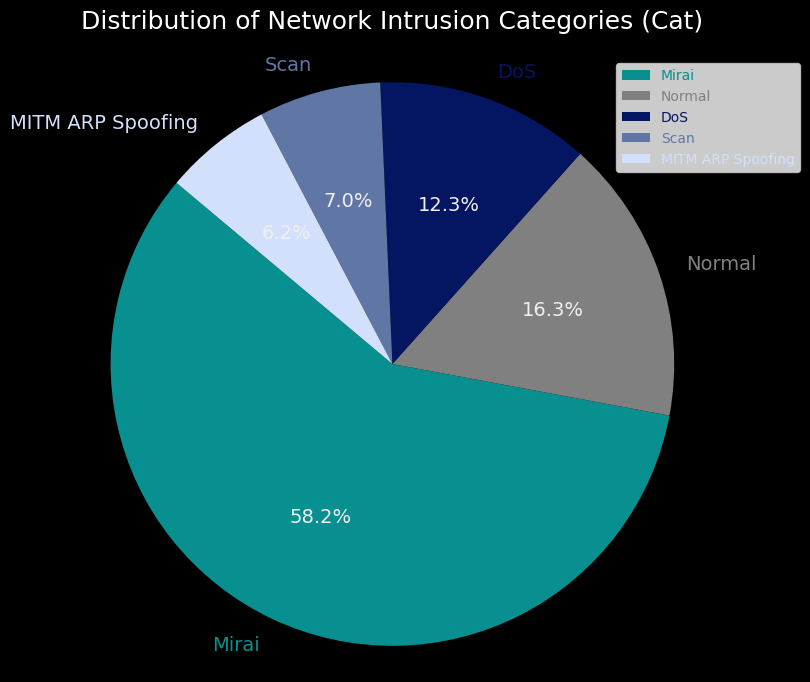

In [70]:
# Count the occurrences of each category in the "Cat" column
cat_counts = data["Cat"].value_counts()

# Define custom colors for the pie chart slices
custom_colors = ['#088F8F', '#808080', '#041562', '#6077a5', '#D2E0FB']

# Find the category with the maximum count
max_count_category = cat_counts.idxmax()

# Create a figure with a black background
fig = plt.figure(figsize=(8, 8), facecolor='black')

# Create a pie chart with custom colors and labels
colors = [custom_colors[i % len(custom_colors)] for i in range(len(cat_counts))]
highlight_index = cat_counts.index.get_loc(max_count_category)
colors[highlight_index] = '#088F8F'  # Set color for the category with the maximum count

# Specify colors for label text
label_colors = ['#088F8F', '#808080', '#041562', '#6077a5', '#D2E0FB']

# Create the pie chart with colored labels
_, texts, autotexts = plt.pie(
    cat_counts,
    labels=cat_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'color': 'white', 'fontsize': 14},  # Text color and fontsize for category labels
)

# Customize the label text colors
for i, text in enumerate(texts):
    text.set_color(label_colors[i % len(label_colors)])

# Set the title font size and add space between title and pie chart
plt.title("Distribution of Network Intrusion Categories (Cat)", color='white', fontsize=18, pad=20)  # Larger title fontsize and padding

# Set the axis background color to black
plt.gca().set_facecolor('black')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Create a separate legend with a white background
legend = plt.legend(cat_counts.index, loc='upper left', bbox_to_anchor=(0.85, 1))
frame = legend.get_frame()
for text, color in zip(legend.get_texts(), label_colors):
    text.set_color(color)

# Edit text color for percentage numbers in slicer
for autotext in autotexts:
    autotext.set_color('#F1EFEF')

# Show the plot
plt.show()

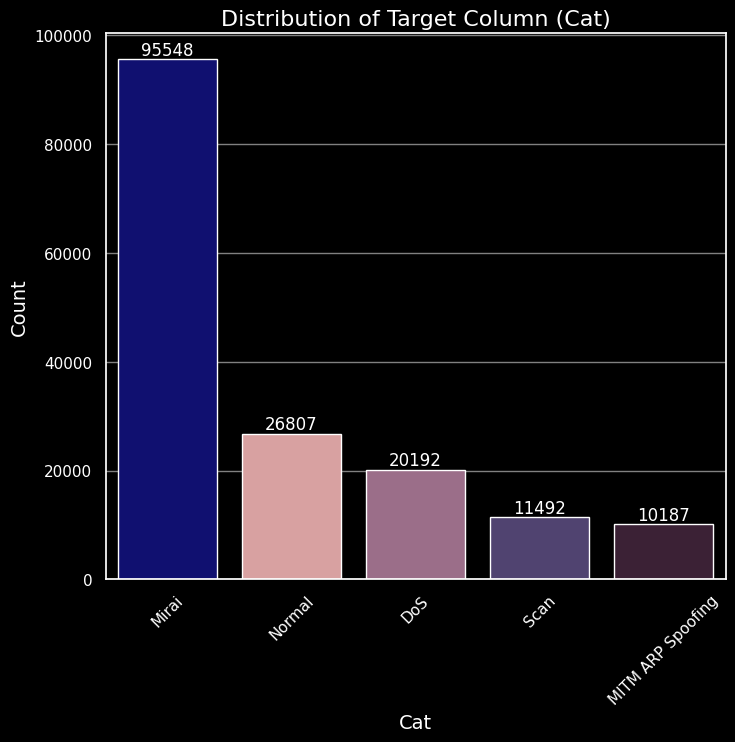

In [71]:
# Calculate the counts of each class in the target variable "Cat"
cat_counts = data['Cat'].value_counts()

# Create a figure with a black background
plt.figure(figsize=(8, 6), facecolor='black')
sns.set(rc={"axes.facecolor": "black", "grid.color": "gray"})

colors = ['navy', '#E19898', '#A2678A', '#4D3C77', '#3F1D38']

sns.countplot(data=data, x='Cat',palette=colors, order=cat_counts.index)
plt.title('Distribution of Target Column (Cat)', color='white', fontsize=16)
plt.xlabel('Cat', color='white', fontsize=14)
plt.ylabel('Count', color='white', fontsize=14)

# Display the counts on the plot with white text
for i, count in enumerate(cat_counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=12, color='white')

plt.xticks(rotation=45, color='white')
plt.yticks(color='white')
plt.subplots_adjust(top=1.02)
plt.show()

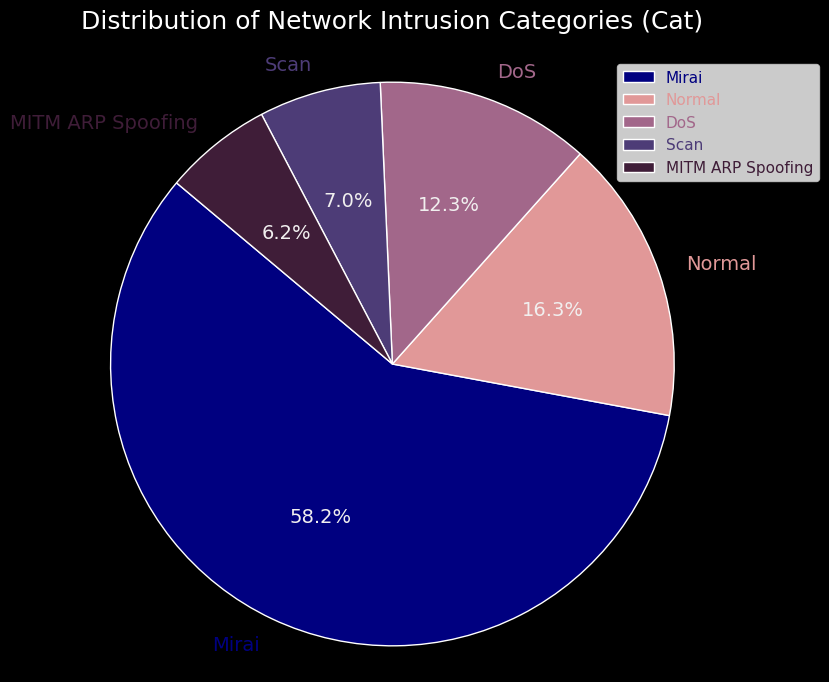

In [72]:
# Count the occurrences of each category in the "Cat" column
cat_counts = data["Cat"].value_counts()

# Define custom colors for the pie chart slices
custom_colors = ['navy', '#E19898', '#A2678A', '#4D3C77', '#3F1D38']

# Find the category with the maximum count
max_count_category = cat_counts.idxmax()

# Create a figure with a black background
fig = plt.figure(figsize=(8, 8), facecolor='black')

# Create a pie chart with custom colors and labels
colors = [custom_colors[i % len(custom_colors)] for i in range(len(cat_counts))]
highlight_index = cat_counts.index.get_loc(max_count_category)
colors[highlight_index] = 'navy'  # Set color for the category with the maximum count

# Specify colors for label text
label_colors = ['navy', '#E19898', '#A2678A', '#4D3C77', '#3F1D38']

# Create the pie chart with colored labels
_, texts, autotexts = plt.pie(
    cat_counts,
    labels=cat_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'color': 'white', 'fontsize': 14},  # Text color and fontsize for category labels
)

# Customize the label text colors
for i, text in enumerate(texts):
    text.set_color(label_colors[i % len(label_colors)])

# Set the title font size and add space between title and pie chart
plt.title("Distribution of Network Intrusion Categories (Cat)", color='white', fontsize=18, pad=20)  # Larger title fontsize and padding

# Set the axis background color to black
plt.gca().set_facecolor('black')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Create a separate legend with a white background
legend = plt.legend(cat_counts.index, loc='upper left', bbox_to_anchor=(0.85, 1), facecolor='white')
frame = legend.get_frame()
for text, color in zip(legend.get_texts(), label_colors):
    text.set_color(color)

# Edit text color for percentage numbers in slicer
for autotext in autotexts:
    autotext.set_color('#F1EFEF')

# Show the plot
plt.show()

#Descriptive Analytic and Visualizations - Insights

**Features have realtion with DoS Category**

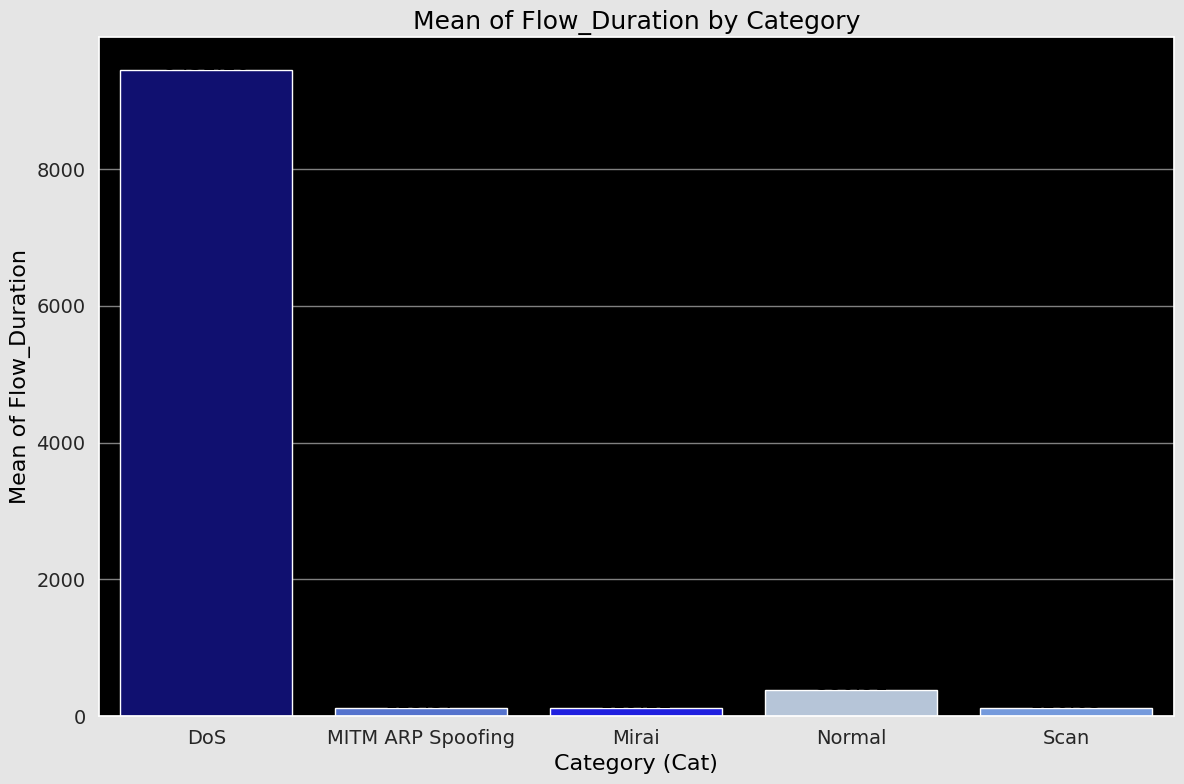

In [73]:
# Create a gray background for the entire figure
fig = plt.figure(figsize=(12, 8))
fig.patch.set_facecolor('#E5E5E5')

# Calculate mean of Flow_Duration for each category
Flow_Duration_by_cat = data.groupby('Cat')['Flow_Duration'].mean().reset_index()

# Bar Plot
# Define a list of colors for the bars
bar_colors = ['navy', 'royalblue', 'blue', 'lightsteelblue', 'cornflowerblue']
sns.barplot(x='Cat', y='Flow_Duration', data=Flow_Duration_by_cat, palette=bar_colors)
plt.title('Mean of Flow_Duration by Category', fontsize=18, color='#000000')
plt.xlabel('Category (Cat)', fontsize=16, color='#000000')
plt.ylabel('Mean of Flow_Duration', fontsize=16, color='#000000')
plt.tick_params(axis='both', labelsize=14, color='#000000')

# Add values above each bar with larger font size
for index, row in Flow_Duration_by_cat.iterrows():
    plt.text(index, row['Flow_Duration'] + 0.03, round(row['Flow_Duration'], 2), color='#000000', ha="center", fontsize=15)

plt.tight_layout()
plt.show()

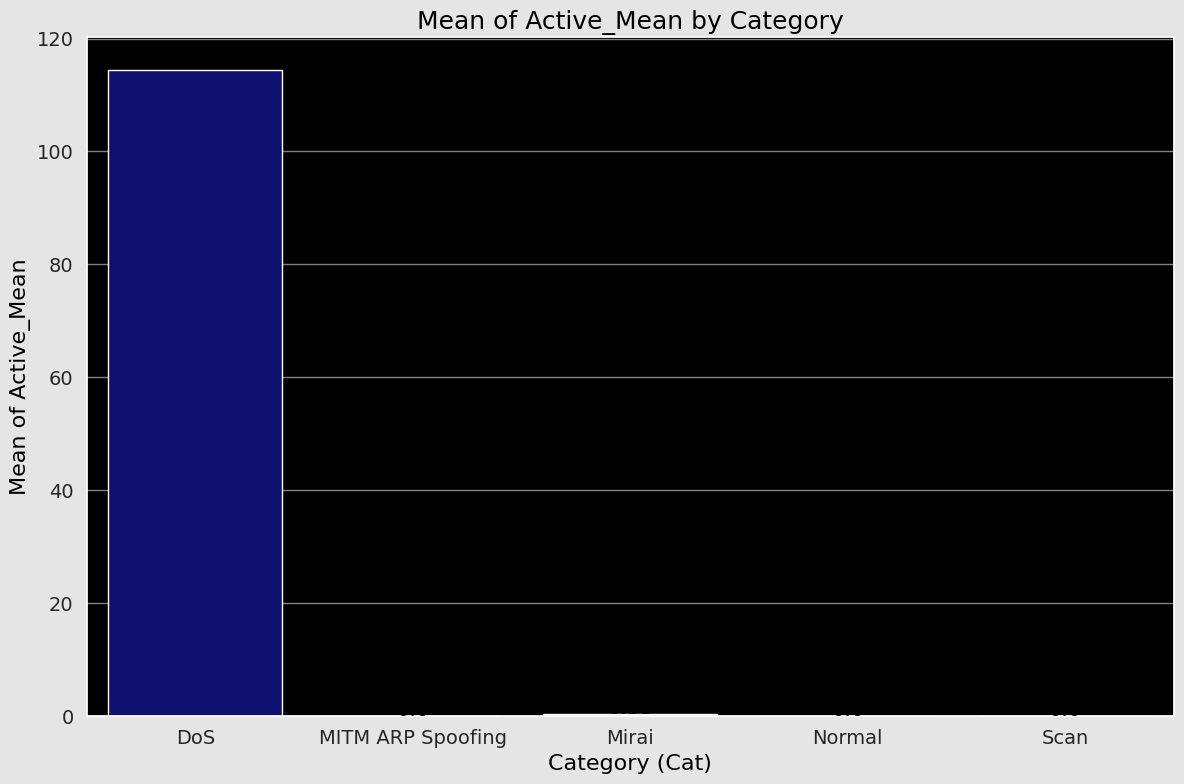

In [74]:
# Create a gray background for the entire figure
fig = plt.figure(figsize=(12, 8))
fig.patch.set_facecolor('#E5E5E5')

# Calculate mean of Active_Mean for each category
Active_Mean_by_cat = data.groupby('Cat')['Active_Mean'].mean().reset_index()

# Bar Plot
# Define a list of colors for the bars
bar_colors = ['navy', 'royalblue', 'blue', 'lightsteelblue', 'cornflowerblue']
sns.barplot(x='Cat', y='Active_Mean', data=Active_Mean_by_cat, palette=bar_colors)
plt.title('Mean of Active_Mean by Category', fontsize=18, color='#000000')
plt.xlabel('Category (Cat)', fontsize=16, color='#000000')
plt.ylabel('Mean of Active_Mean', fontsize=16, color='#000000')
plt.tick_params(axis='both', labelsize=14, color='#000000')

# Add values above each bar with larger font size
for index, row in Active_Mean_by_cat.iterrows():
    plt.text(index, row['Active_Mean'] + 0.03, round(row['Active_Mean'], 2), color='#000000', ha="center", fontsize=15)

plt.tight_layout()
plt.show()

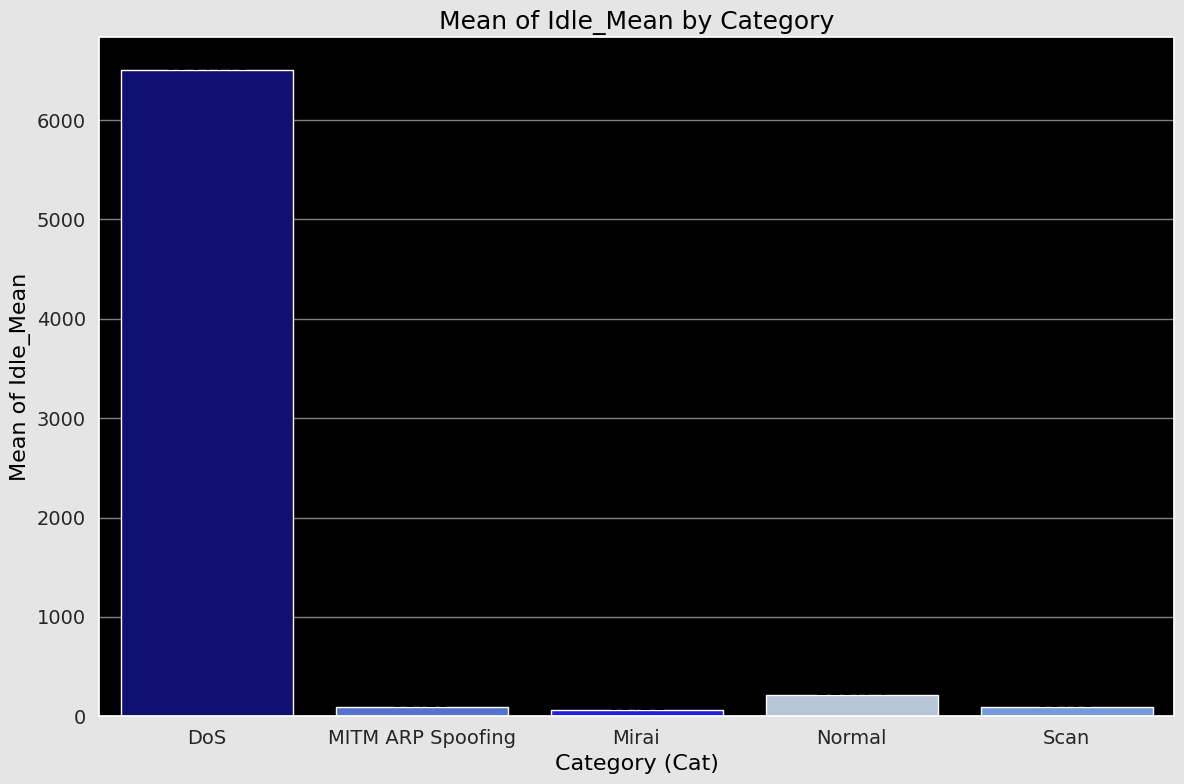

In [75]:
# Create a gray background for the entire figure
fig = plt.figure(figsize=(12, 8))
fig.patch.set_facecolor('#E5E5E5')

# Calculate mean of Idle_Mean for each category
Idle_Mean_by_cat = data.groupby('Cat')['Idle_Mean'].mean().reset_index()

# Bar Plot
# Define a list of colors for the bars
bar_colors = ['navy', 'royalblue', 'blue', 'lightsteelblue', 'cornflowerblue']
sns.barplot(x='Cat', y='Idle_Mean', data=Idle_Mean_by_cat, palette=bar_colors)
plt.title('Mean of Idle_Mean by Category', fontsize=18, color='#000000')
plt.xlabel('Category (Cat)', fontsize=16, color='#000000')
plt.ylabel('Mean of Idle_Mean', fontsize=16, color='#000000')
plt.tick_params(axis='both', labelsize=14, color='#000000')

# Add values above each bar with larger font size
for index, row in Idle_Mean_by_cat.iterrows():
    plt.text(index, row['Idle_Mean'] + 0.03, round(row['Idle_Mean'], 2), color='#000000', ha="center", fontsize=15)

plt.tight_layout()
plt.show()

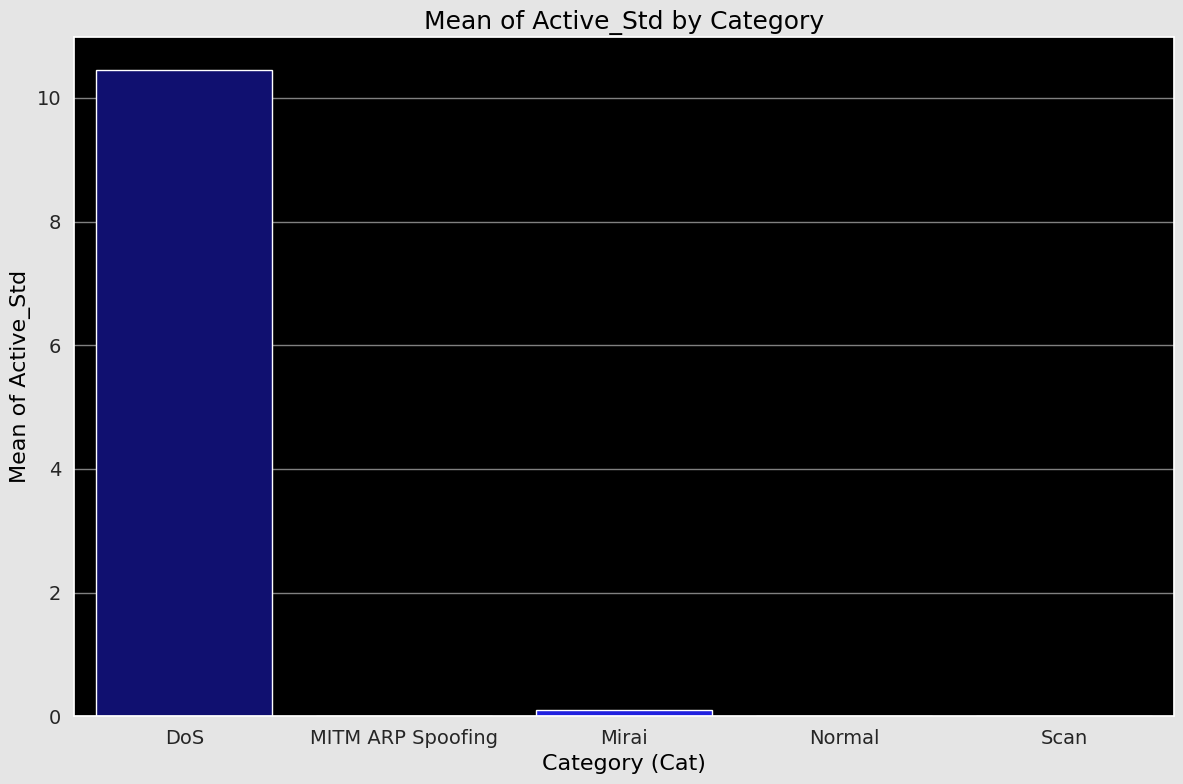

In [76]:
# Create a gray background for the entire figure
fig = plt.figure(figsize=(12, 8))
fig.patch.set_facecolor('#E5E5E5')

# Calculate mean of Active_Std for each category
Active_Std_by_cat = data.groupby('Cat')['Active_Std'].mean().reset_index()

# Bar Plot
# Define a list of colors for the bars
bar_colors = ['navy', 'royalblue', 'blue', 'lightsteelblue', 'cornflowerblue']
sns.barplot(x='Cat', y='Active_Std', data=Active_Std_by_cat, palette=bar_colors)
plt.title('Mean of Active_Std by Category', fontsize=18, color='#000000')
plt.xlabel('Category (Cat)', fontsize=16, color='#000000')
plt.ylabel('Mean of Active_Std', fontsize=16, color='#000000')
plt.tick_params(axis='both', labelsize=14, color='#000000')

# Add values above each bar with larger font size
for index, row in Active_Std_by_cat.iterrows():
    plt.text(index, row['Active_Std'] + 0.03, round(row['Active_Std'], 2), color='#000000', ha="center", fontsize=15)

plt.tight_layout()
plt.show()

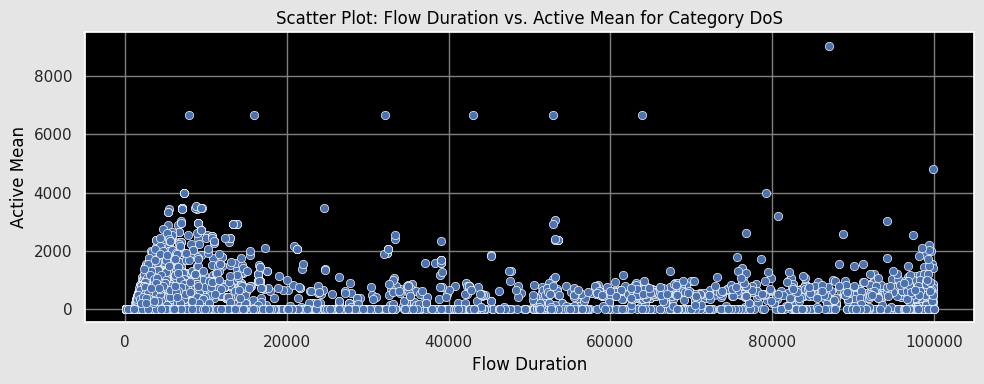

In [77]:
# Filter the data where 'Cat' is 'DoS'
dos_data = data[data['Cat'] == 'DoS']

# Create scatter plots
plt.figure(figsize=(10, 4))
sns.scatterplot(data=dos_data, x='Flow_Duration', y='Active_Mean')
plt.title('Scatter Plot: Flow Duration vs. Active Mean for Category DoS', color='#000000')
plt.xlabel('Flow Duration', color='#000000')
plt.ylabel('Active Mean', color='#000000')

# Create a gray background for the entire figure
fig = plt.gcf()
fig.patch.set_facecolor('#E5E5E5')

# Show the plot
plt.tight_layout()
plt.show()

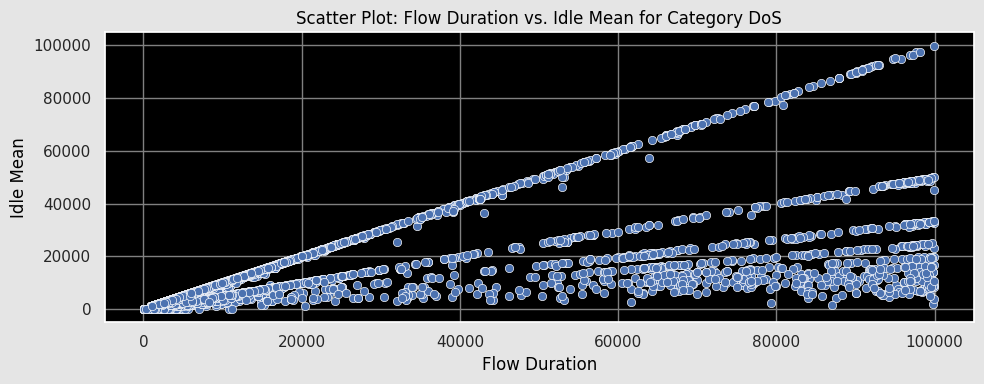

In [78]:
# Filter the data where 'Cat' is 'DoS'
dos_data = data[data['Cat'] == 'DoS']

# Create scatter plots
plt.figure(figsize=(10, 4))
sns.scatterplot(data=dos_data, x='Flow_Duration', y='Idle_Mean')
plt.title('Scatter Plot: Flow Duration vs. Idle Mean for Category DoS', color='#000000')
plt.xlabel('Flow Duration', color='#000000')
plt.ylabel('Idle Mean', color='#000000')

# Create a gray background for the entire figure
fig = plt.gcf()
fig.patch.set_facecolor('#E5E5E5')

# Show the plot
plt.tight_layout()
plt.show()

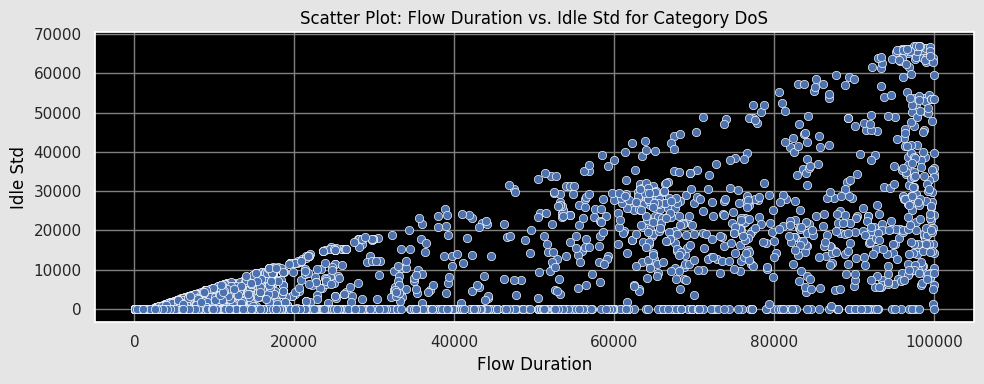

In [79]:
# Filter the data where 'Cat' is 'DoS'
dos_data = data[data['Cat'] == 'DoS']

# Create scatter plots
plt.figure(figsize=(10, 4))
sns.scatterplot(data=dos_data, x='Flow_Duration', y='Idle_Std')
plt.title('Scatter Plot: Flow Duration vs. Idle Std for Category DoS', color='#000000')
plt.xlabel('Flow Duration', color='#000000')
plt.ylabel('Idle Std', color='#000000')

# Create a gray background for the entire figure
fig = plt.gcf()
fig.patch.set_facecolor('#E5E5E5')

# Show the plot
plt.tight_layout()
plt.show()

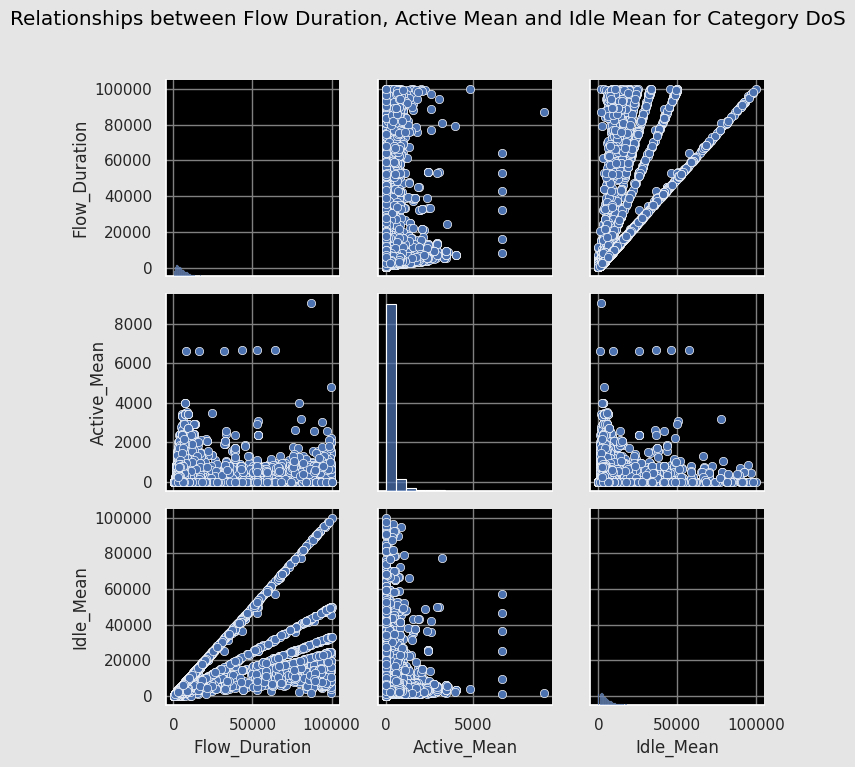

In [80]:
# Filter the data where 'Cat' is 'DoS'
dos_data = data[data['Cat'] == 'DoS']

# Select the columns of interest
columns_of_interest = ['Flow_Duration', 'Active_Mean', 'Idle_Mean', 'Cat']

# Create a pair plot with explicit legend labels
pair_plot = sns.pairplot(data=dos_data[columns_of_interest], vars=columns_of_interest[:-1])
pair_plot.fig.suptitle('Relationships between Flow Duration, Active Mean and Idle Mean for Category DoS', y=1.02, color='#000000')

# Create a gray background for the entire figure
fig = plt.gcf()
fig.patch.set_facecolor('#E5E5E5')

# Customize the style of the pair plot with gray grid lines
sns.set(style="whitegrid", rc={"axes.edgecolor": "0.0", "grid.color": "gray","grid.alpha": 0.2})

# Customize the appearance of the ticks on the x-axis and y-axis
ax = plt.gca()
ax.tick_params(axis='x', colors='#000000', which='both', direction='out', length=6, width=2)
ax.tick_params(axis='y', colors='#000000', which='both', direction='out', length=6, width=2)

# Show the plot
plt.tight_layout()
plt.show()

**Features have realtion with Mirai Category**



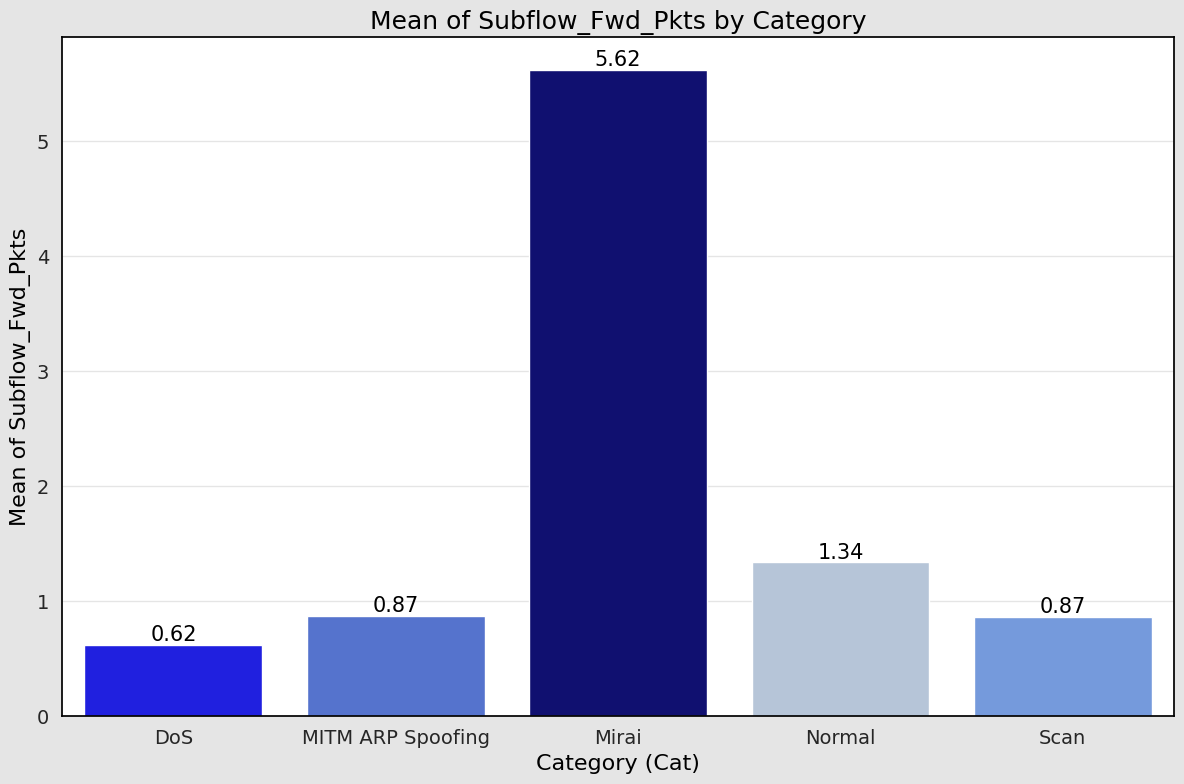

In [81]:
# Create a gray background for the entire figure
fig = plt.figure(figsize=(12, 8))
fig.patch.set_facecolor('#E5E5E5')

# Calculate mean of Fwd_Pkts/s for each category
Subflow_Fwd_Pkts_by_cat = data.groupby('Cat')['Subflow_Fwd_Pkts'].mean().reset_index()

# Bar Plot
# Define a list of colors for the bars
bar_colors = ['blue', 'royalblue', 'navy', 'lightsteelblue', 'cornflowerblue']
sns.barplot(x='Cat', y='Subflow_Fwd_Pkts', data=Subflow_Fwd_Pkts_by_cat, palette=bar_colors)
plt.title('Mean of Subflow_Fwd_Pkts by Category', fontsize=18, color='#000000')
plt.xlabel('Category (Cat)', fontsize=16, color='#000000')
plt.ylabel('Mean of Subflow_Fwd_Pkts', fontsize=16, color='#000000')
plt.tick_params(axis='both', labelsize=14, color='#000000')

# Add values above each bar with larger font size
for index, row in Subflow_Fwd_Pkts_by_cat.iterrows():
    plt.text(index, row['Subflow_Fwd_Pkts'] + 0.03, round(row['Subflow_Fwd_Pkts'], 2), color='#000000', ha="center", fontsize=15)

plt.tight_layout()
plt.show()

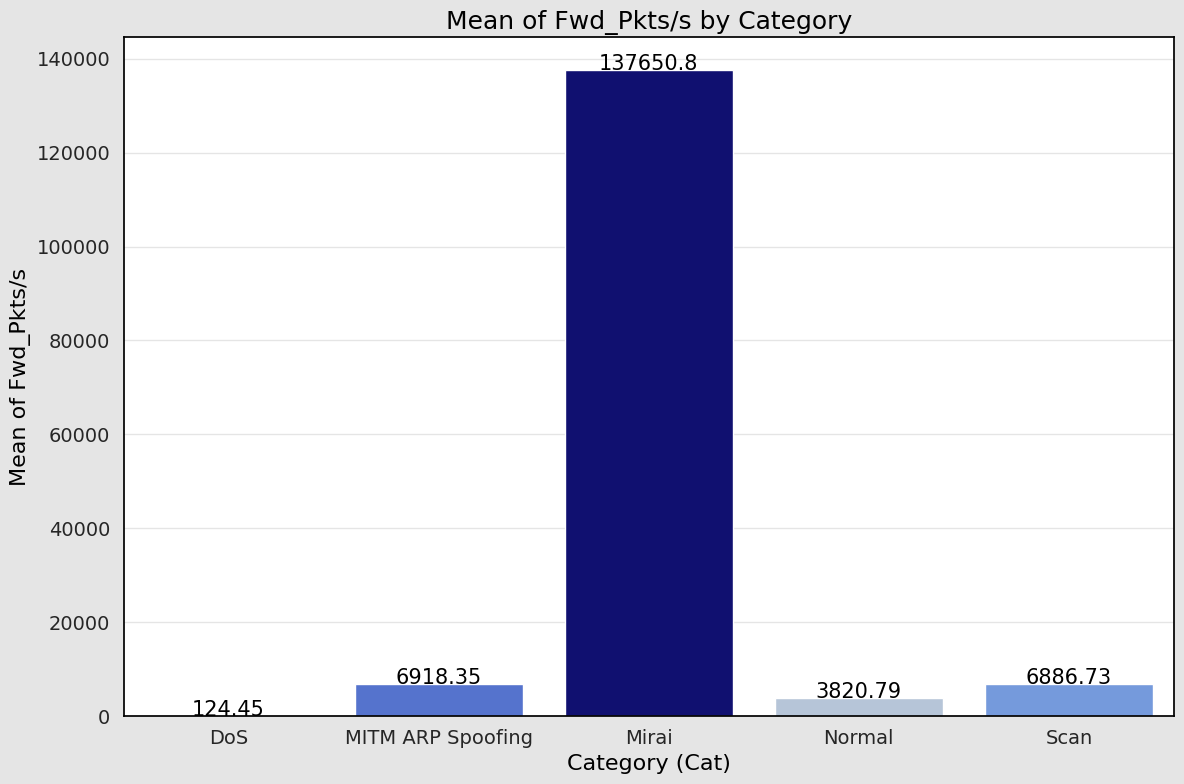

In [82]:
# Create a gray background for the entire figure
fig = plt.figure(figsize=(12, 8))
fig.patch.set_facecolor('#E5E5E5')

# Calculate mean of Fwd_Pkts/s for each category
Fwd_Pkts_by_cat = data.groupby('Cat')['Fwd_Pkts/s'].mean().reset_index()

# Bar Plot
# Define a list of colors for the bars
bar_colors = ['blue', 'royalblue', 'navy', 'lightsteelblue', 'cornflowerblue']
sns.barplot(x='Cat', y='Fwd_Pkts/s', data=Fwd_Pkts_by_cat, palette=bar_colors)
plt.title('Mean of Fwd_Pkts/s by Category', fontsize=18, color='#000000')
plt.xlabel('Category (Cat)', fontsize=16, color='#000000')
plt.ylabel('Mean of Fwd_Pkts/s', fontsize=16, color='#000000')
plt.tick_params(axis='both', labelsize=14, color='#000000')

# Add values above each bar with larger font size
for index, row in Fwd_Pkts_by_cat.iterrows():
    plt.text(index, row['Fwd_Pkts/s'] + 0.03, round(row['Fwd_Pkts/s'], 2), color='#000000', ha="center", fontsize=15)

plt.tight_layout()
plt.show()

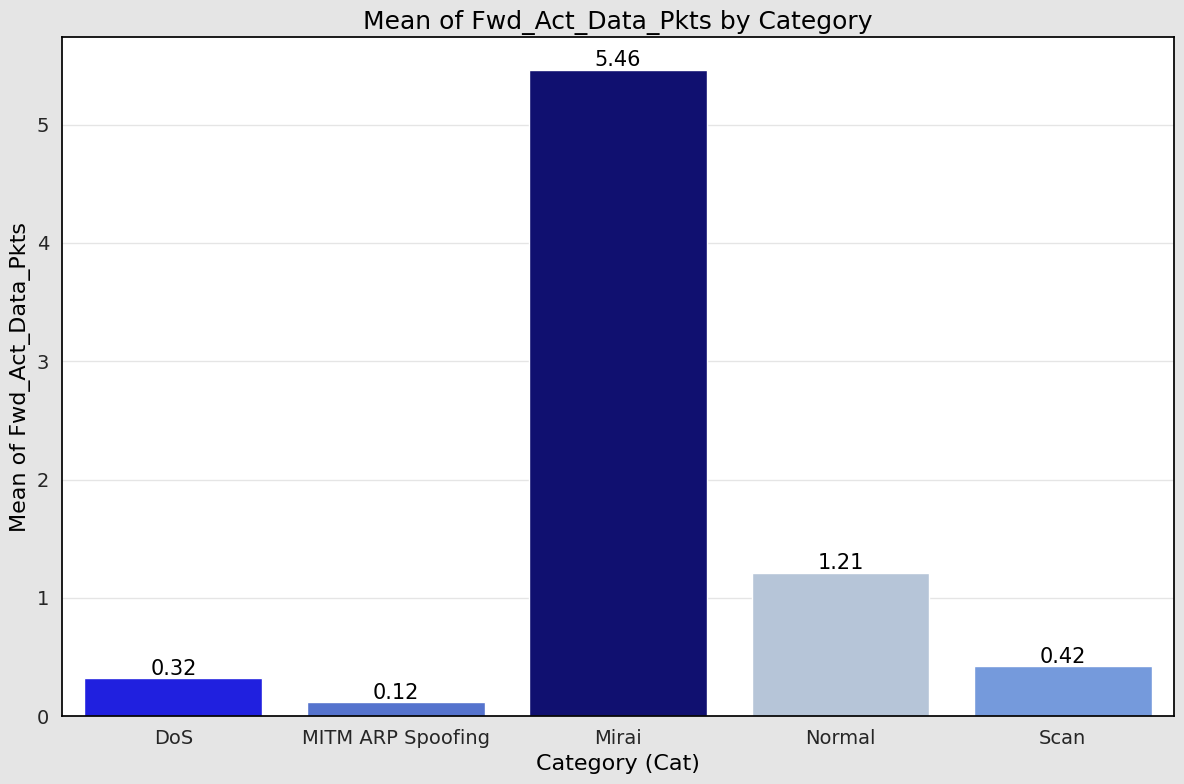

In [83]:
# Create a gray background for the entire figure
fig = plt.figure(figsize=(12, 8))
fig.patch.set_facecolor('#E5E5E5')

# Calculate mean of Fwd_Act_Data_Pkts for each category
Fwd_Act_Data_Pkts_by_cat = data.groupby('Cat')['Fwd_Act_Data_Pkts'].mean().reset_index()

# Bar Plot
# Define a list of colors for the bars
bar_colors = ['blue', 'royalblue', 'navy', 'lightsteelblue', 'cornflowerblue']
sns.barplot(x='Cat', y='Fwd_Act_Data_Pkts', data=Fwd_Act_Data_Pkts_by_cat, palette=bar_colors)
plt.title('Mean of Fwd_Act_Data_Pkts by Category', fontsize=18, color='#000000')
plt.xlabel('Category (Cat)', fontsize=16, color='#000000')
plt.ylabel('Mean of Fwd_Act_Data_Pkts', fontsize=16, color='#000000')
plt.tick_params(axis='both', labelsize=14, color='#000000')

# Add values above each bar with larger font size
for index, row in Fwd_Act_Data_Pkts_by_cat.iterrows():
    plt.text(index, row['Fwd_Act_Data_Pkts'] + 0.03, round(row['Fwd_Act_Data_Pkts'], 2), color='#000000', ha="center", fontsize=15)

plt.tight_layout()
plt.show()

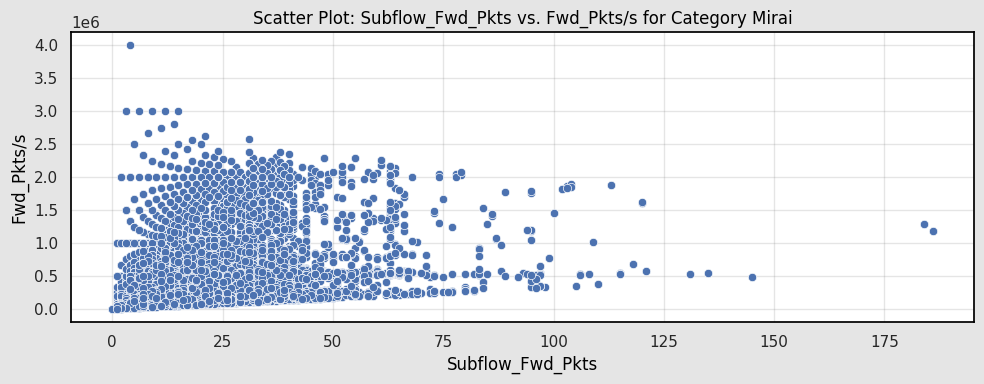

In [84]:
# Filter the data where 'Cat' is 'Mirai'
mirai_data = data[data['Cat'] == 'Mirai']

# Create scatter plots
plt.figure(figsize=(10, 4))
sns.scatterplot(data=mirai_data, x='Subflow_Fwd_Pkts', y='Fwd_Pkts/s')
plt.title('Scatter Plot: Subflow_Fwd_Pkts vs. Fwd_Pkts/s for Category Mirai', color='#000000')
plt.xlabel('Subflow_Fwd_Pkts', color='#000000')
plt.ylabel('Fwd_Pkts/s', color='#000000')

# Create a gray background for the entire figure
fig = plt.gcf()
fig.patch.set_facecolor('#E5E5E5')

# Show the plot
plt.tight_layout()
plt.show()

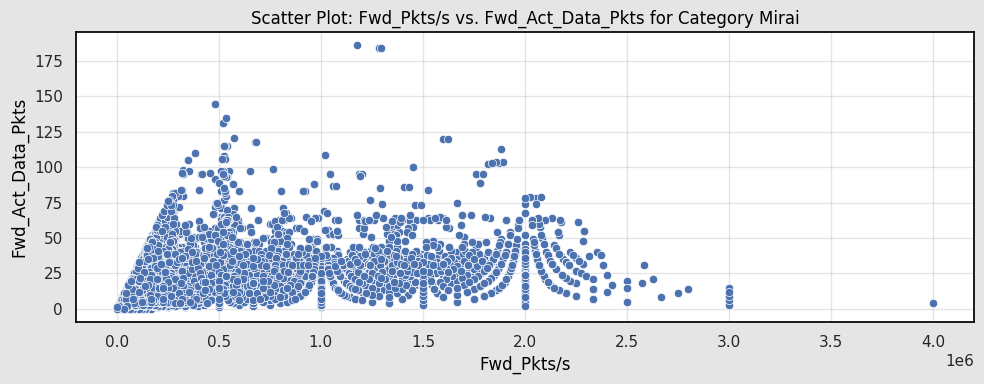

In [85]:
# Create scatter plots
plt.figure(figsize=(10, 4))
sns.scatterplot(data=data[data['Cat'] == 'Mirai'], x='Fwd_Pkts/s', y='Fwd_Act_Data_Pkts')
plt.title('Scatter Plot: Fwd_Pkts/s vs. Fwd_Act_Data_Pkts for Category Mirai', color='#000000')
plt.xlabel('Fwd_Pkts/s', color='#000000')
plt.ylabel('Fwd_Act_Data_Pkts', color='#000000')

# Create a gray background for the entire figure
fig = plt.gcf()
fig.patch.set_facecolor('#E5E5E5')

# Show the plot
plt.tight_layout()
plt.show()

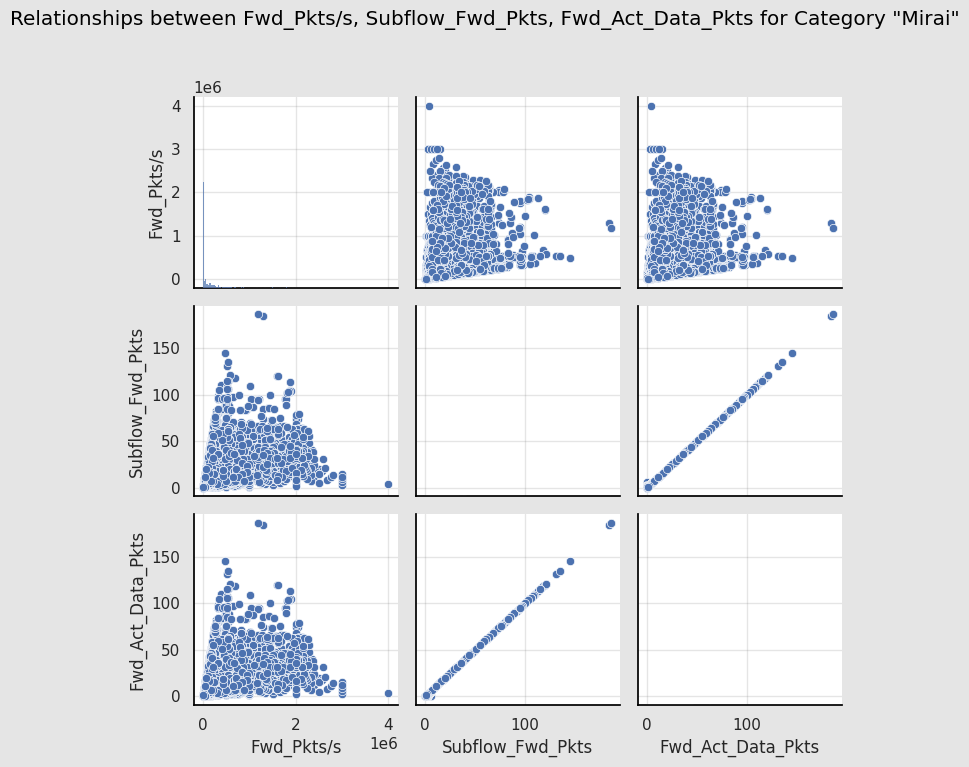

In [86]:
# Select the columns of interest
columns_of_interest = ['Fwd_Pkts/s', 'Subflow_Fwd_Pkts', 'Fwd_Act_Data_Pkts', 'Cat']

# Filter the data for the 'Mirai' category
mirai_data = data[data['Cat'] == 'Mirai']

# Create a pair plot with explicit legend labels for the 'Mirai' category
mirai_pair_plot = sns.pairplot(data=mirai_data[columns_of_interest], vars=columns_of_interest[:-1])
mirai_pair_plot.fig.suptitle('Relationships between Fwd_Pkts/s, Subflow_Fwd_Pkts, Fwd_Act_Data_Pkts for Category "Mirai"', y=1.02, color='#000000')

# Create a gray background for the entire figure
fig = plt.gcf()
fig.patch.set_facecolor('#E5E5E5')

# Customize the style of the pair plot with gray grid lines
sns.set(style="whitegrid", rc={"axes.edgecolor": "0.0", "grid.color": "gray", "grid.alpha": 0.2})

# Customize the appearance of the ticks on the x-axis and y-axis
ax = plt.gca()
ax.tick_params(axis='x', colors='#000000', which='both', direction='out', length=6, width=2)
ax.tick_params(axis='y', colors='#000000', which='both', direction='out', length=6, width=2)

# Show the plot
plt.tight_layout()
plt.show()

#Predictive Analytics

In [87]:
#identify all categorical variables
cat_columns = data.select_dtypes(['object']).columns
cat_columns

Index(['Cat'], dtype='object')

In [88]:
# Define features (X) and target (Y)
# labeled data here is Cat Column

X = data.drop('Cat', axis=1)

Y = data['Cat']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=22)

In [89]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Classification Algorithms**

Classification with Scikit Learn

**Training by Linear Support Vector Classification**

In [90]:
# LinearSVC
from sklearn.svm import LinearSVC

total_features_P = X.shape[1]  # Get the total number of features in your dataset
n_features_to_select_P = int(0.80 * total_features_P)  # Calculate 80% of the features

SVC_classifier = LinearSVC(max_iter=n_features_to_select_P)
SVC_classifier.fit(X_train, Y_train)
y_pred = SVC_classifier.predict(X_test)

# Calculate evaluation metrics
SVC_accuracy = accuracy_score(Y_test, y_pred)
SVC_f1_score = f1_score(Y_test, y_pred, average='weighted')
SVC_recall = recall_score(Y_test, y_pred, average='weighted')
SVC_precision = precision_score(Y_test, y_pred, average='weighted')

print("Accuracy:", SVC_accuracy)
print("Precision Score:", SVC_precision)
print("Recall Score:", SVC_recall)
print("F1 Score:", SVC_f1_score)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy: 0.8306643122450222
Precision Score: 0.7945857543643342
Recall Score: 0.8306643122450222
F1 Score: 0.8040873485900354


In [91]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(Y_test, y_pred, average='weighted')

(0.7945857543643342, 0.8306643122450222, 0.8040873485900354, None)

In [92]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

                   precision    recall  f1-score   support

              DoS       1.00      1.00      1.00      2058
MITM ARP Spoofing       0.32      0.10      0.15      1037
            Mirai       0.82      0.95      0.88      9487
           Normal       0.92      0.86      0.89      2670
             Scan       0.38      0.19      0.26      1171

         accuracy                           0.83     16423
        macro avg       0.69      0.62      0.63     16423
     weighted avg       0.79      0.83      0.80     16423



In [93]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, y_pred))

[[2048    0    7    1    2]
 [   0  103  804   12  118]
 [   0  128 8968  160  231]
 [   0   11  349 2296   14]
 [   0   84  821   39  227]]


**Training by K-Nearest Neighbors Classifier**

In [94]:
# KNeighbors
from sklearn.neighbors import KNeighborsClassifier

total_features_K = X.shape[1]  # Get the total number of features in your dataset
n_features_to_select_K = int(0.25 * total_features_K)  # Calculate 25% of the features
knn_classifier = KNeighborsClassifier(n_neighbors=n_features_to_select_K)
knn_classifier.fit(X_train, Y_train)
y_pred = knn_classifier.predict(X_test)

# Calculate evaluation metrics
knn_accuracy = accuracy_score(Y_test, y_pred)
knn_f1_score = f1_score(Y_test, y_pred, average='weighted')
knn_recall = recall_score(Y_test, y_pred, average='weighted')
knn_precision = precision_score(Y_test, y_pred, average='weighted')

print("Accuracy:", knn_accuracy)
print("Precision Score:", knn_precision)
print("Recall Score:", knn_recall)
print("F1 Score:", knn_f1_score)

Accuracy: 0.861170309931194
Precision Score: 0.8436928139825315
Recall Score: 0.861170309931194
F1 Score: 0.8487132383117486


In [95]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(Y_test, y_pred, average='weighted')

(0.8436928139825315, 0.861170309931194, 0.8487132383117486, None)

In [96]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

                   precision    recall  f1-score   support

              DoS       1.00      0.99      1.00      2058
MITM ARP Spoofing       0.39      0.24      0.30      1037
            Mirai       0.86      0.94      0.90      9487
           Normal       0.96      0.92      0.94      2670
             Scan       0.57      0.39      0.46      1171

         accuracy                           0.86     16423
        macro avg       0.76      0.70      0.72     16423
     weighted avg       0.84      0.86      0.85     16423



In [97]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, y_pred))

[[2043    2    9    4    0]
 [   0  247  711    8   71]
 [   1  248 8956   67  215]
 [   1   19  156 2444   50]
 [   1  111  579   27  453]]


**Training by Decision Tree Classifier**

In [98]:
# Create Decision Tree classifer object
classifer2 = DecisionTreeClassifier()
# Train Decision Tree Classifer

classifer2.fit(X_train,Y_train)
y_pred= classifer2.predict(X_test)  # testing the model

DT_score = f1_score(Y_test,y_pred, average='weighted')
DT_recall = recall_score(Y_test, y_pred, average='weighted')
DT_accuracy = accuracy_score(Y_test,y_pred)
DT_precision = precision_score(Y_test, y_pred, average='weighted')

print("Accuracy: ", DT_accuracy)
print("Precision Score : ", DT_precision)
print("Recall Score : ", DT_recall)
print("F1_score: ", DT_score)

Accuracy:  0.8447908421116727
Precision Score :  0.8459206246233073
Recall Score :  0.8447908421116727
F1_score:  0.8445387836016978


In [99]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(Y_test, y_pred, average='weighted')

(0.8459206246233073, 0.8447908421116727, 0.8445387836016978, None)

In [100]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

                   precision    recall  f1-score   support

              DoS       0.99      1.00      1.00      2058
MITM ARP Spoofing       0.29      0.34      0.31      1037
            Mirai       0.89      0.90      0.89      9487
           Normal       0.94      0.93      0.94      2670
             Scan       0.52      0.39      0.45      1171

         accuracy                           0.84     16423
        macro avg       0.73      0.71      0.72     16423
     weighted avg       0.85      0.84      0.84     16423



In [101]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, y_pred))

[[2053    4    1    0    0]
 [   7  355  554   16  105]
 [   2  577 8523   99  286]
 [   2   42  109 2483   34]
 [   1  262  418   30  460]]


**Training by GaussianNB**

In [102]:
# Gaussian Naive Bayes (GaussianNB)

classifer3 = GaussianNB()

classifer3.fit(X_train,Y_train)

#Predict the response for test dataset
y_pred = classifer3.predict(X_test)

Gnb_score = f1_score(Y_test,y_pred, average='weighted')
Gnb_recall = recall_score(Y_test, y_pred, average='weighted')
Gnb_accuracy = accuracy_score(Y_test,y_pred)
Gnb_precision = precision_score(Y_test, y_pred, average='weighted')

print("Accuracy: ", Gnb_accuracy)
print("Precision Score : ", Gnb_precision)
print("Recall Score : ", Gnb_recall)
print("F1_score: ", Gnb_score)

Accuracy:  0.6694270230773914
Precision Score :  0.8641734726068213
Recall Score :  0.6694270230773914
F1_score:  0.7154411156120186


In [103]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(Y_test, y_pred, average='weighted')

(0.8641734726068213, 0.6694270230773914, 0.7154411156120186, None)

In [104]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

                   precision    recall  f1-score   support

              DoS       1.00      0.99      1.00      2058
MITM ARP Spoofing       0.21      0.93      0.34      1037
            Mirai       1.00      0.56      0.71      9487
           Normal       0.84      0.91      0.88      2670
             Scan       0.18      0.24      0.21      1171

         accuracy                           0.67     16423
        macro avg       0.65      0.73      0.63     16423
     weighted avg       0.86      0.67      0.72     16423



In [105]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, y_pred))

[[2043    8    3    3    1]
 [   0  968    0    6   63]
 [   1 2687 5269  416 1114]
 [   0  164   13 2434   59]
 [   1  859    1   30  280]]


**Training by Logistic Regression**

In [106]:
# Create the Logistic Regression model
log = LogisticRegression(max_iter=10000)

log.fit(X_train,Y_train)

#Predict the response for test dataset
y_pred = log.predict(X_test)

Log_score = f1_score(Y_test,y_pred, average='weighted')
Log_recall = recall_score(Y_test, y_pred, average='weighted')
Log_accuracy = accuracy_score(Y_test,y_pred)
Log_precision = precision_score(Y_test, y_pred, average='weighted')

print("Accuracy: ", Log_accuracy)
print("Precision Score : ", Log_precision)
print("Recall Score : ", Log_recall)
print("F1_score: ", Log_score)

Accuracy:  0.8393107227668514
Precision Score :  0.7863232826288492
Recall Score :  0.8393107227668514
F1_score:  0.7933628472847476


In [107]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(Y_test, y_pred, average='weighted')

(0.7863232826288492, 0.8393107227668514, 0.7933628472847476, None)

In [108]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

                   precision    recall  f1-score   support

              DoS       1.00      1.00      1.00      2058
MITM ARP Spoofing       0.20      0.00      0.00      1037
            Mirai       0.80      0.97      0.88      9487
           Normal       0.93      0.88      0.91      2670
             Scan       0.49      0.12      0.19      1171

         accuracy                           0.84     16423
        macro avg       0.68      0.59      0.60     16423
     weighted avg       0.79      0.84      0.79     16423



In [109]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, y_pred))

[[2049    0    8    1    0]
 [   0    2 1001    0   34]
 [   0    5 9235  152   95]
 [   3    2  293 2361   11]
 [   0    1 1010   23  137]]


**Training by Random Forest Classifier**

In [110]:
# Random Forest Classifier

rfc = RandomForestClassifier()

rfc.fit(X_train,Y_train)

#Predict the response for test dataset
y_pred = rfc.predict(X_test)

RFC_score = f1_score(Y_test,y_pred, average='weighted')
RFC_recall = recall_score(Y_test, y_pred, average='weighted')
RFC_accuracy = accuracy_score(Y_test,y_pred)
RFC_precision = precision_score(Y_test, y_pred, average='weighted')

print("Accuracy: ",RFC_accuracy)
print("Precision Score : ",RFC_precision)
print("Recall Score : ",RFC_recall)
print("F1_score: ",RFC_score)

Accuracy:  0.8375449065335201
Precision Score :  0.830575984045606
Recall Score :  0.8375449065335201
F1_score:  0.8338384503209157


In [111]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(Y_test, y_pred, average='weighted')

(0.830575984045606, 0.8375449065335201, 0.8338384503209157, None)

In [112]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

                   precision    recall  f1-score   support

              DoS       1.00      1.00      1.00      2058
MITM ARP Spoofing       0.27      0.24      0.25      1037
            Mirai       0.88      0.90      0.89      9487
           Normal       0.95      0.93      0.94      2670
             Scan       0.40      0.36      0.38      1171

         accuracy                           0.84     16423
        macro avg       0.70      0.69      0.69     16423
     weighted avg       0.83      0.84      0.83     16423



In [113]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, y_pred))

[[2055    2    0    0    1]
 [   2  249  587   16  183]
 [   1  480 8540   66  400]
 [   0   27   92 2488   63]
 [   0  164  534   50  423]]


**Classification Algorithms**

In [114]:
# Define the algorithms and their metrics
algorithms = [
    ('Random Forest Classifier', RFC_accuracy, RFC_precision, RFC_recall, RFC_score),
    ('Logistic Regression', Log_accuracy, Log_precision, Log_recall, Log_score),
    ('GaussianNB', Gnb_accuracy, Gnb_precision, Gnb_recall, Gnb_score),
    ('Decision Tree Classifier', DT_accuracy, DT_precision, DT_recall, DT_score),
    ('KNeighbors Classifier', knn_accuracy, knn_precision, knn_recall, knn_f1_score),
    ('Linear SVC', SVC_accuracy, SVC_precision, SVC_recall, SVC_f1_score)
]

# Create a DataFrame
df = pd.DataFrame(algorithms, columns=['Algorithm', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Print the DataFrame
print(df)

                  Algorithm  Accuracy  Precision    Recall  F1-Score
0  Random Forest Classifier  0.837545   0.830576  0.837545  0.833838
1       Logistic Regression  0.839311   0.786323  0.839311  0.793363
2                GaussianNB  0.669427   0.864173  0.669427  0.715441
3  Decision Tree Classifier  0.844791   0.845921  0.844791  0.844539
4     KNeighbors Classifier  0.861170   0.843693  0.861170  0.848713
5                Linear SVC  0.830664   0.794586  0.830664  0.804087


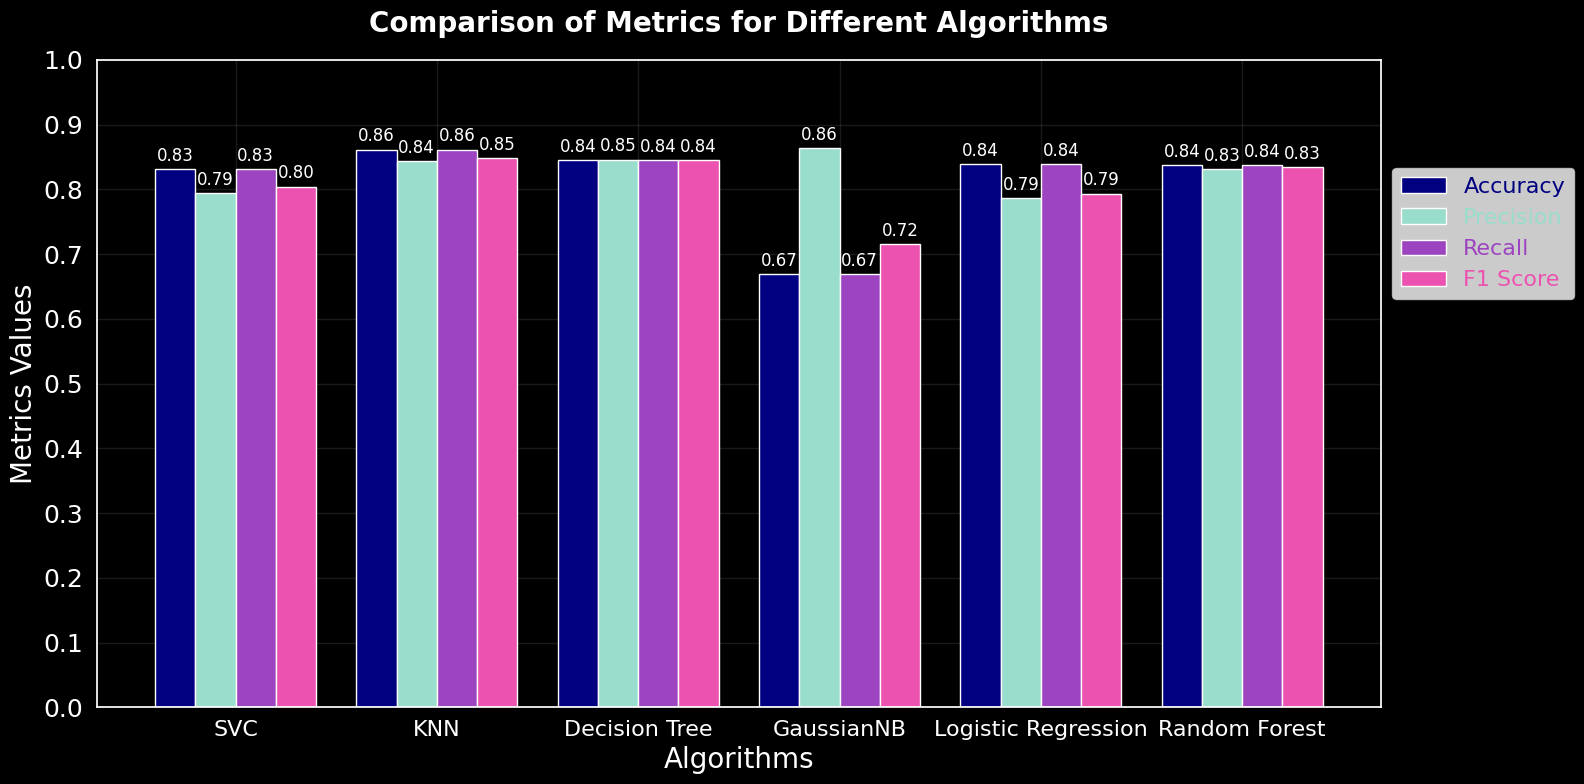

In [115]:
algorithms = ['SVC', 'KNN', 'Decision Tree', 'GaussianNB', 'Logistic Regression', 'Random Forest']
accuracy_scores = [SVC_accuracy, knn_accuracy, DT_accuracy, Gnb_accuracy, Log_accuracy, RFC_accuracy]
recall_scores = [SVC_recall, knn_recall, DT_recall, Gnb_recall, Log_recall, RFC_recall]
f1_scores = [SVC_f1_score, knn_f1_score, DT_score, Gnb_score, Log_score, RFC_score]
precision_scores = [SVC_precision, knn_precision, DT_precision, Gnb_precision, Log_precision, RFC_precision]

# Set custom bar colors
bar_colors = ['navy', '#99DDCC', '#9D44C0', '#EC53B0']

bar_width = 0.20
index = np.arange(len(algorithms))

# Create subplots
fig, ax = plt.subplots(figsize=(16, 8))
fig.patch.set_facecolor('black')  # Set background color to black
ax.set_facecolor('black')

# Create bars for each metric
bars1 = ax.bar(index, accuracy_scores, width=bar_width, label='Accuracy', color=bar_colors[0])
bars2 = ax.bar(index + bar_width, precision_scores, width=bar_width, label='Precision', color=bar_colors[1])
bars3 = ax.bar(index + 2 * bar_width, recall_scores, width=bar_width, label='Recall', color=bar_colors[2])
bars4 = ax.bar(index + 3 * bar_width, f1_scores, width=bar_width, label='F1 Score', color=bar_colors[3])

# Set x-ticks and labels
ax.set_xlabel('Algorithms', fontsize=20, color='white')
ax.set_ylabel('Metrics Values', fontsize=20, color='white')
ax.set_title('Comparison of Metrics for Different Algorithms', fontsize=20, fontweight='bold', color='white', pad=20)

ax.set_xticks(index + 1.5 * bar_width)
ax.set_xticklabels(algorithms, fontsize=16, color='white')

ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_yticklabels([str(round(val, 2)) for val in np.arange(0, 1.1, 0.1)], fontsize=18, color='white')

# Add values above each bar with white color
def add_values(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords='offset points',
                    fontsize=12,
                    color='white',
                    ha='center', va='bottom')

add_values(bars1)
add_values(bars2)
add_values(bars3)
add_values(bars4)

legend = ax.legend(loc='upper left', bbox_to_anchor=(1, 0.85), fontsize=16)
for text in legend.get_texts():
    text.set_color('white')
frame = legend.get_frame()
for text, color in zip(legend.get_texts(), bar_colors):
    text.set_color(color)

# Set axis line colors to white
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

ax.tick_params(axis='both', colors='white')

plt.tight_layout()
plt.show()

In [116]:
# Define the algorithms and their metrics
algorithms_values = [
    ('SVC', SVC_accuracy, SVC_precision, SVC_recall, SVC_f1_score),
    ('KNN', knn_accuracy, knn_precision, knn_recall, knn_f1_score),
    ('Decision Tree', DT_accuracy, DT_precision, DT_recall, DT_score),
    ('GaussianNB', Gnb_accuracy, Gnb_precision, Gnb_recall, Gnb_score),
    ('Logistic Regression', Log_accuracy, Log_precision, Log_recall, Log_score),
    ('Random Forest', RFC_accuracy, RFC_precision, RFC_recall, RFC_score)
]

# Create a DataFrame
df_algorithms = pd.DataFrame(algorithms_values, columns=['Models', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Find the row with the maximum accuracy
max_F1_Score_row = df_algorithms[df_algorithms['F1-Score'] == df_algorithms['F1-Score'].max()]

# Create a style function to set the background color and font color
def highlight_max(s):
    bg_color = ['background-color: #03C988' if s.name == max_F1_Score_row.index[0] else 'background-color: black'] * len(s)
    font_color = 'color: white'
    border = 'border: 1px solid white;'
    return [f'{bg}; {font_color}; {border}' for bg in bg_color]

# Apply the style function to the DataFrame
styled_df = df_algorithms.style.apply(highlight_max, axis=1)

# Style the DataFrame to adjust font size and style
styled_df = styled_df.set_table_styles([{
    'selector': 'th',
    'props': [('font-size', '24px'), ('text-align', 'center'), ('font-weight', 'bold'), ('background-color', 'black'), ('color', 'darkblue'), ('border', '1px solid white')]
}, {
    'selector': 'td',
    'props': [('font-size', '18px'), ('text-align', 'center'), ('color', 'white')]
}])

# Display the styled DataFrame
styled_df

,Models,Accuracy,Precision,Recall,F1-Score
0,SVC,0.830664,0.794586,0.830664,0.804087
1,KNN,0.861170,0.843693,0.861170,0.848713
2,Decision Tree,0.844791,0.845921,0.844791,0.844539
3,GaussianNB,0.669427,0.864173,0.669427,0.715441
4,Logistic Regression,0.839311,0.786323,0.839311,0.793363
5,Random Forest,0.837545,0.830576,0.837545,0.833838


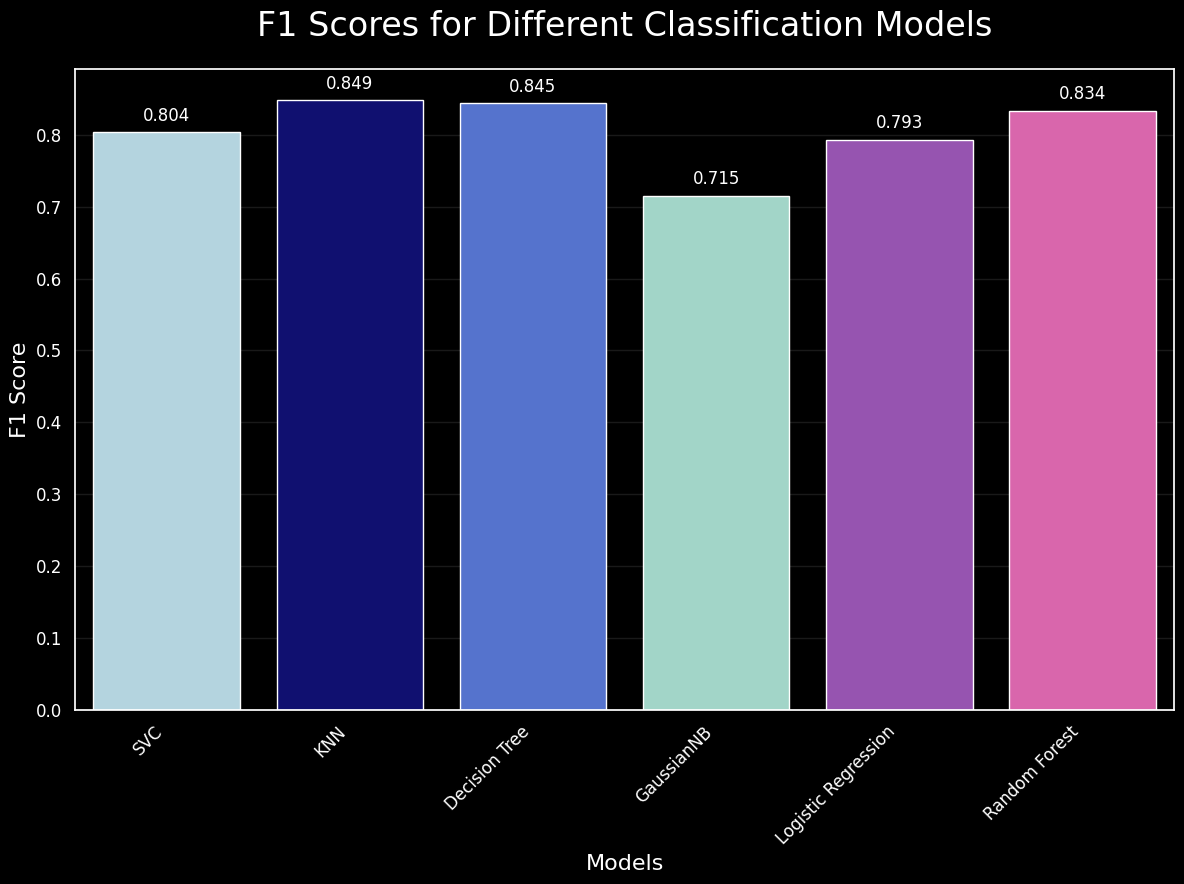

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set custom bar colors
colors = ['lightblue', 'navy', 'royalblue', '#99DDCC', '#9D44C0', '#EC53B0']

model_name = ['SVC', 'KNN', 'Decision Tree', 'GaussianNB', 'Logistic Regression', 'Random Forest']
f1_values = [SVC_f1_score, knn_f1_score, DT_score, Gnb_score, Log_score, RFC_score]

# Create a figure and axis with a black background
fig, ax = plt.subplots(figsize=(12, 9))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

ax = sns.barplot(x=model_name, y=f1_values, palette=colors)

# Set title and labels with white text
plt.title('F1 Scores for Different Classification Models', color='white', fontsize=24, pad=24)
plt.xlabel('Models', color='white', fontsize=16)
plt.ylabel('F1 Score', color='white', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right", color='white', fontsize=12)
plt.yticks(color='white', fontsize=12)

# Add values above each bar with white color
for i, v in enumerate(f1_values):
    ax.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontsize=12, color='white')

# Set axis line colors to white
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

plt.tight_layout()
plt.show()

**Feature Selection**

**VarianceThreshold**

In [118]:
from sklearn.feature_selection import VarianceThreshold
var_selector = VarianceThreshold(threshold = 0.02)

# Fit the selector on the training data and transform both training and testing data
X_train_Vselected = var_selector.fit_transform(X_train)
X_test_Vselected = var_selector.transform(X_test)

In [119]:
# Get the selected features
selected_features = X.columns[var_selector.get_support()]
selected_features

Index(['Flow_Duration', 'Tot_Fwd_Pkts', 'Tot_Bwd_Pkts', 'TotLen_Fwd_Pkts',
       'TotLen_Bwd_Pkts', 'Fwd_Pkt_Len_Max', 'Fwd_Pkt_Len_Min',
       'Fwd_Pkt_Len_Mean', 'Fwd_Pkt_Len_Std', 'Bwd_Pkt_Len_Max',
       'Bwd_Pkt_Len_Min', 'Bwd_Pkt_Len_Mean', 'Bwd_Pkt_Len_Std',
       'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min',
       'Fwd_IAT_Tot', 'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max',
       'Fwd_IAT_Min', 'Bwd_IAT_Tot', 'Bwd_IAT_Mean', 'Bwd_IAT_Std',
       'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Bwd_PSH_Flags', 'Bwd_URG_Flags',
       'Fwd_Header_Len', 'Bwd_Header_Len', 'Fwd_Pkts/s', 'Bwd_Pkts/s',
       'Pkt_Len_Min', 'Pkt_Len_Max', 'Pkt_Len_Mean', 'Pkt_Len_Std',
       'Pkt_Len_Var', 'FIN_Flag_Cnt', 'SYN_Flag_Cnt', 'RST_Flag_Cnt',
       'PSH_Flag_Cnt', 'ACK_Flag_Cnt', 'URG_Flag_Cnt', 'CWE_Flag_Count',
       'ECE_Flag_Cnt', 'Down/Up_Ratio', 'Pkt_Size_Avg', 'Fwd_Seg_Size_Avg',
       'Bwd_Seg_Size_Avg', 'Subflow_Fwd_Pkts', 'Subflow_Fwd_Byts',
       'Subflow_Bwd_Pkts', 

Training by K-Nearest Neighbours

In [120]:
# Training by K-Nearest Neighbours - KNN
total_features_K = X.shape[1]  # Get the total number of features in your dataset
n_features_to_select_K = int(0.25 * total_features_K)  # Calculate 25% of the features
classifer_KNNvar = KNeighborsClassifier(n_neighbors=n_features_to_select_K)
classifer_KNNvar.fit(X_train_Vselected, Y_train)
y_pred = classifer_KNNvar.predict(X_test_Vselected)

# Calculate evaluation metrics
var_KNNscore = f1_score(Y_test, y_pred, average='weighted')
var_KNNrecall = recall_score(Y_test, y_pred, average='weighted')
var_KNNaccuracy = accuracy_score(Y_test, y_pred)
var_KNNprecision = precision_score(Y_test, y_pred, average='weighted')

print("Accuracy: ", var_KNNaccuracy)
print("Precision Score : ", var_KNNprecision)
print("Recall Score : ", var_KNNrecall)
print("F1_score: ", var_KNNscore)

Accuracy:  0.8613529805760214
Precision Score :  0.8439210210497934
Recall Score :  0.8613529805760214
F1_score:  0.8489014805562233


Training by Decision Tree Classifier

In [121]:
# Train Decision Tree Classifer

classifer_var = DecisionTreeClassifier(max_depth=17)
classifer_var.fit(X_train_Vselected, Y_train)
y_pred= classifer_var.predict(X_test_Vselected)  # testing the model

var_score = f1_score(Y_test,y_pred, average='weighted')
var_recall = recall_score(Y_test, y_pred, average='weighted')
var_accuracy = accuracy_score(Y_test,y_pred)
var_precision = precision_score(Y_test, y_pred, average='weighted')

print("Accuracy: ", var_accuracy)
print("Precision Score : ", var_precision)
print("Recall Score : ", var_recall)
print("F1_score: ", var_score)

Accuracy:  0.8836996894599038
Precision Score :  0.8724352340203873
Recall Score :  0.8836996894599038
F1_score:  0.8751270948830586


**SelectKBest (Univariate feature selection)**

In [122]:
from sklearn.feature_selection import SelectKBest, f_classif

In [123]:
# SelectKBest

constant_feature_selector = VarianceThreshold()
X_no_constant = constant_feature_selector.fit_transform(X)

total_features_K = X.shape[1]  # Get the total number of features in your dataset
n_features_to_select_K = int(0.25 * total_features_K)  # Calculate 25% of the features

k_selector = SelectKBest(score_func=f_classif, k=n_features_to_select_K)

X_new = k_selector.fit_transform(X_no_constant, Y)

# Split the data into training and testing sets
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, Y, test_size=0.1, random_state=22)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_new = scaler.fit_transform(X_train_new)
X_test_new = scaler.transform(X_test_new)

total_features_K = X.shape[1]  # Get the total number of features in your dataset
n_features_to_select_K = int(0.25 * total_features_K)  # Calculate 25% of the features
K_selector = SelectKBest(k = n_features_to_select_K)

X_train_Kselected = K_selector.fit_transform(X_train_new, y_train_new)

X_test_Kselected = K_selector.transform(X_test_new)

Training by K-Nearest Neighbours

In [124]:
# Training by K-Nearest Neighbours - KNN
total_features_K = X.shape[1]  # Get the total number of features in your dataset
n_features_to_select_K = int(0.25 * total_features_K)  # Calculate 25% of the features
KNNclassifer_K = KNeighborsClassifier(n_neighbors=n_features_to_select_K)
KNNclassifer_K.fit(X_train_Kselected, Y_train)
y_pred = KNNclassifer_K.predict(X_test_Kselected)

K_KNNscore = f1_score(y_test_new,y_pred, average='weighted')
K_KNNrecall = recall_score(y_test_new, y_pred, average='weighted')
K_KNNaccuracy = accuracy_score(y_test_new,y_pred)
K_KNNprecision = precision_score(y_test_new, y_pred, average='weighted')

print("Accuracy: ", K_KNNaccuracy)
print("Precision Score : ", K_KNNprecision)
print("Recall Score : ", K_KNNrecall)
print("F1_score: ", K_KNNscore)

Accuracy:  0.8556901905863727
Precision Score :  0.8345498731124711
Recall Score :  0.8556901905863727
F1_score:  0.84147144605146


Training by Decision Tree Classifier

In [125]:
# Train Decision Tree Classifer
classifer_K = DecisionTreeClassifier()
classifer_K.fit(X_train_Kselected, y_train_new)
y_pred= classifer_K.predict(X_test_Kselected)  # testing the model

K_DTscore = f1_score(y_test_new,y_pred, average='weighted')
K_DTrecall = recall_score(y_test_new, y_pred, average='weighted')
K_DTaccuracy = accuracy_score(y_test_new,y_pred)
K_DTprecision = precision_score(y_test_new, y_pred, average='weighted')

print("Accuracy: ", K_DTaccuracy)
print("Precision Score : ", K_DTprecision)
print("Recall Score : ", K_DTrecall)
print("F1_score: ", K_DTscore)

Accuracy:  0.8416854411496073
Precision Score :  0.8372731062288493
Recall Score :  0.8416854411496073
F1_score:  0.8384393384849553


**SelectFromModel**

In [126]:
from sklearn.feature_selection import SelectFromModel

Training by Decision Tree

In [127]:
# SelectFromModel

classifer_DTsfm = DecisionTreeClassifier()

sfm_DTselector = SelectFromModel(classifer_DTsfm, threshold=0.01)
# Transform both training and testing data to select important features
X_train_MselectedDT = sfm_DTselector.fit_transform(X_train, Y_train)
X_test_MselectedDT = sfm_DTselector.transform(X_test)
# Fit the classifier on the selected features
classifer_DTsfm.fit(X_train_MselectedDT, Y_train)
# Make predictions on the test set
y_pred = classifer_DTsfm.predict(X_test_MselectedDT)

sfm_score = f1_score(Y_test,y_pred, average='weighted')
sfm_recall = recall_score(Y_test, y_pred, average='weighted')
sfm_accuracy = accuracy_score(Y_test,y_pred)
sfm_precision = precision_score(Y_test, y_pred, average='weighted')

print("Accuracy: ", sfm_accuracy)
print("Precision Score : ", sfm_precision)
print("Recall Score : ", sfm_recall)
print("F1_score: ", sfm_score)


Accuracy:  0.8547159471472934
Precision Score :  0.8523964537155874
Recall Score :  0.8547159471472934
F1_score:  0.8528720826591698


**Recursive feature elimination (RFE)**

In [128]:
from sklearn.feature_selection import RFE
#from sklearn.linear_model import LogisticRegression

total_features = X.shape[1]  # Get the total number of features in your dataset
n_features_to_select = int(0.25 * total_features)  # Calculate 25% of the features

model = DecisionTreeClassifier()

rfe_selector = RFE(estimator=model, n_features_to_select=n_features_to_select)
# Fit the selector on the training data and transform both training and testing data
X_train_RFEselected = rfe_selector.fit_transform(X_train,Y_train)
X_test_RFEselected = rfe_selector.transform(X_test)

Training by Decision Tree

In [129]:
# Train Decision Tree Classifer

classifer_RFE = DecisionTreeClassifier(max_depth=17)
classifer_RFE.fit(X_train_RFEselected, Y_train)
y_pred= classifer_RFE.predict(X_test_RFEselected)  # testing the model

RFE_DTscore = f1_score(Y_test,y_pred, average='weighted')
RFE_DTrecall = recall_score(Y_test, y_pred, average='weighted')
RFE_DTaccuracy = accuracy_score(Y_test,y_pred)
RFE_DTprecision = precision_score(Y_test, y_pred, average='weighted')

print("Accuracy: ", RFE_DTaccuracy)
print("Precision Score : ", RFE_DTprecision)
print("Recall Score : ", RFE_DTrecall)
print("F1_score: ", RFE_DTscore)

Accuracy:  0.8810814102173781
Precision Score :  0.8685635771175669
Recall Score :  0.8810814102173781
F1_score:  0.8717289192761066


**Select Percentile (Univariate feature selection)**

In [130]:
from sklearn.feature_selection import SelectPercentile, f_classif

constant_feature_selector = VarianceThreshold()
X_no_constant = constant_feature_selector.fit_transform(X)

P_selector = SelectPercentile(score_func=f_classif, percentile=25)

X_new = P_selector.fit_transform(X_no_constant, Y)

# Split the data into training and testing sets
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, Y, test_size=0.1, random_state=22)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_new = scaler.fit_transform(X_train_new)
X_test_new = scaler.transform(X_test_new)

P_selector = SelectPercentile(score_func=f_classif, percentile=50)

X_train_Pselected = P_selector.fit_transform(X_train_new, y_train_new)
X_test_Pselected = P_selector.transform(X_test_new)

Training by K-Nearest Neighbours

In [131]:
# Training by K-Nearest Neighbours - KNN

total_features_K = X.shape[1]  # Get the total number of features in your dataset
n_features_to_select_K = int(0.25 * total_features_K)  # Calculate 25% of the features
KNNclassifer_P = KNeighborsClassifier(n_neighbors=n_features_to_select_K)
KNNclassifer_P.fit(X_train_Pselected, Y_train)
y_pred = KNNclassifer_P.predict(X_test_Pselected)

P_KNNscore = f1_score(y_test_new,y_pred, average='weighted')
P_KNNrecall = recall_score(y_test_new, y_pred, average='weighted')
P_KNNaccuracy = accuracy_score(y_test_new,y_pred)
P_KNNprecision = precision_score(y_test_new, y_pred, average='weighted')

print("Accuracy: ", P_KNNaccuracy)
print("Precision Score : ", P_KNNprecision)
print("Recall Score : ", P_KNNrecall)
print("F1_score: ", P_KNNscore)

Accuracy:  0.8271326797783596
Precision Score :  0.7653240037515205
Recall Score :  0.8271326797783596
F1_score:  0.7810097833706137


Training by Decision Tree Classifer

In [132]:
# Train Decision Tree Classifer

DTclassifer_P = DecisionTreeClassifier(max_depth=17)
DTclassifer_P.fit(X_train_Pselected, y_train_new)
y_pred= DTclassifer_P.predict(X_test_Pselected)  # testing the model

P_DTscore = f1_score(y_test_new,y_pred, average='weighted')
P_DTrecall = recall_score(y_test_new, y_pred, average='weighted')
P_DTaccuracy = accuracy_score(y_test_new,y_pred)
P_DTprecision = precision_score(y_test_new, y_pred, average='weighted')

print("Accuracy: ", P_DTaccuracy)
print("Precision Score : ", P_DTprecision)
print("Recall Score : ", P_DTrecall)
print("F1_score: ", P_DTscore)

Accuracy:  0.829446507946173
Precision Score :  0.753289104455632
Recall Score :  0.829446507946173
F1_score:  0.7737154093035133


**Generic Univariate Select (Univariate feature selection)**

In [133]:
from sklearn.feature_selection import GenericUnivariateSelect, f_classif

constant_feature_selector = VarianceThreshold()
X_no_constant = constant_feature_selector.fit_transform(X)

total_features_P = X.shape[1]  # Get the total number of features in your dataset
n_features_to_select_P = int(0.25 * total_features_P)  # Calculate 25% of the features

GUS_selector = GenericUnivariateSelect(score_func=f_classif, mode='k_best', param=n_features_to_select_P)

X_new = GUS_selector.fit_transform(X_no_constant, Y)

# Split the data into training and testing sets
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, Y, test_size=0.1, random_state=22)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_new = scaler.fit_transform(X_train_new)
X_test_new = scaler.transform(X_test_new)


total_features_P = X.shape[1]  # Get the total number of features in your dataset
n_features_to_select_P = int(0.25 * total_features_P)  # Calculate 25% of the features
GUS_selector = GenericUnivariateSelect(score_func=f_classif, mode='k_best', param=n_features_to_select_P)

X_train_GUSselected = GUS_selector.fit_transform(X_train_new, y_train_new)
X_test_GUSselected = GUS_selector.transform(X_test_new)

Training by K-Nearest Neighbours

In [134]:
# Training by K-Nearest Neighbours - KNN
total_features_K = X.shape[1]  # Get the total number of features in your dataset
n_features_to_select_K = int(0.25 * total_features_K)  # Calculate 25% of the features
KNNclassifer_GUS = KNeighborsClassifier(n_neighbors=n_features_to_select_K)
KNNclassifer_GUS.fit(X_train_GUSselected, Y_train)
y_pred = KNNclassifer_GUS.predict(X_test_GUSselected)

GUS_KNNscore = f1_score(y_test_new,y_pred, average='weighted')
GUS_KNNrecall = recall_score(y_test_new, y_pred, average='weighted')
GUS_KNNaccuracy = accuracy_score(y_test_new,y_pred)
GUS_KNNprecision = precision_score(y_test_new, y_pred, average='weighted')

print("Accuracy: ", GUS_KNNaccuracy)
print("Precision Score : ", GUS_KNNprecision)
print("Recall Score : ", GUS_KNNrecall)
print("F1_score: ", GUS_KNNscore)

Accuracy:  0.8556901905863727
Precision Score :  0.8345498731124711
Recall Score :  0.8556901905863727
F1_score:  0.84147144605146


Training by Decision Tree Classifer

In [135]:
# Train Decision Tree Classifer

DTclassifer_GUS = DecisionTreeClassifier(max_depth=17)
DTclassifer_GUS.fit(X_train_GUSselected, y_train_new)
y_pred= DTclassifer_GUS.predict(X_test_GUSselected)  # testing the model

GUS_DTscore = f1_score(y_test_new,y_pred, average='weighted')
GUS_DTrecall = recall_score(y_test_new, y_pred, average='weighted')
GUS_DTaccuracy = accuracy_score(y_test_new,y_pred)
GUS_DTprecision = precision_score(y_test_new, y_pred, average='weighted')

print("Accuracy: ", GUS_DTaccuracy)
print("Precision Score : ", GUS_DTprecision)
print("Recall Score : ", GUS_DTrecall)
print("F1_score: ", GUS_DTscore)

Accuracy:  0.8721305486208366
Precision Score :  0.8554157329819494
Recall Score :  0.8721305486208366
F1_score:  0.8601372763351379


**SelectFpr (Univariate feature selection)**

In [136]:
from sklearn.feature_selection import SelectFpr, f_classif

constant_feature_selector = VarianceThreshold()
X_no_constant = constant_feature_selector.fit_transform(X)

fpr_selector = SelectFpr(score_func=f_classif, alpha=0.25)

X_new = fpr_selector.fit_transform(X_no_constant, Y)

# Split the data into training and testing sets
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, Y, test_size=0.1, random_state=22)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_new = scaler.fit_transform(X_train_new)
X_test_new = scaler.transform(X_test_new)

fpr_selector = SelectFpr(alpha=0.25)

X_train_FPRselected = fpr_selector.fit_transform(X_train_new, y_train_new)
X_test_FPRselected = fpr_selector.transform(X_test_new)

Training by K-Nearest Neighbours

In [137]:
# Training by K-Nearest Neighbours - KNN
total_features_K = X.shape[1]  # Get the total number of features in your dataset
n_features_to_select_K = int(0.25 * total_features_K)  # Calculate 25% of the features
KNNclassifer_FPR = KNeighborsClassifier(n_neighbors=n_features_to_select_K)
KNNclassifer_FPR.fit(X_train_FPRselected, Y_train)
y_pred = KNNclassifer_FPR.predict(X_test_FPRselected)

FPR_KNNscore = f1_score(y_test_new,y_pred, average='weighted')
FPR_KNNrecall = recall_score(y_test_new, y_pred, average='weighted')
FPR_KNNaccuracy = accuracy_score(y_test_new,y_pred)
FPR_KNNprecision = precision_score(y_test_new, y_pred, average='weighted')

print("Accuracy: ", FPR_KNNaccuracy)
print("Precision Score : ", FPR_KNNprecision)
print("Recall Score : ", FPR_KNNrecall)
print("F1_score: ", FPR_KNNscore)

Accuracy:  0.8616574316507337
Precision Score :  0.8441812228098279
Recall Score :  0.8616574316507337
F1_score:  0.8491047098304519


Training by Decision Tree Classifer

In [138]:
# Train Decision Tree Classifer

DTclassifer_FPR = DecisionTreeClassifier(max_depth=17)
DTclassifer_FPR.fit(X_train_FPRselected, y_train_new)
y_pred= DTclassifer_FPR.predict(X_test_FPRselected)

FPR_DTscore = f1_score(y_test_new,y_pred, average='weighted')
FPR_DTrecall = recall_score(y_test_new, y_pred, average='weighted')
FPR_DTaccuracy = accuracy_score(y_test_new,y_pred)
FPR_DTprecision = precision_score(y_test_new, y_pred, average='weighted')

print("Accuracy: ", FPR_DTaccuracy)
print("Precision Score : ", FPR_DTprecision)
print("Recall Score : ", FPR_DTrecall)
print("F1_score: ", FPR_DTscore)

Accuracy:  0.8839432503196736
Precision Score :  0.8725289357313523
Recall Score :  0.8839432503196736
F1_score:  0.8752697605586011


**SelectFdr (Univariate feature selection)**

In [139]:
from sklearn.feature_selection import SelectFdr, f_classif

constant_feature_selector = VarianceThreshold()
X_no_constant = constant_feature_selector.fit_transform(X)

fdr_selector = SelectFdr(score_func=f_classif, alpha=0.25)

X_new = fdr_selector.fit_transform(X_no_constant, Y)

# Split the data into training and testing sets
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, Y, test_size=0.1, random_state=22)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_new = scaler.fit_transform(X_train_new)
X_test_new = scaler.transform(X_test_new)

fdr_selector = SelectFdr(score_func=f_classif, alpha=0.25)

X_train_FDRselected = fdr_selector.fit_transform(X_train_new, y_train_new)
X_test_FDRselected = fdr_selector.transform(X_test_new)

Training by K-Nearest Neighbours

In [140]:
# Training by K-Nearest Neighbours - KNN

total_features_K = X.shape[1]  # Get the total number of features in your dataset
n_features_to_select_K = int(0.25 * total_features_K)  # Calculate 25% of the features
KNNclassifer_Fdr = KNeighborsClassifier(n_neighbors=n_features_to_select_K)
KNNclassifer_Fdr.fit(X_train_FDRselected, y_train_new)
y_pred= KNNclassifer_Fdr.predict(X_test_FDRselected)

Fdr_KNNscore = f1_score(y_test_new,y_pred, average='weighted')
Fdr_KNNrecall = recall_score(y_test_new, y_pred, average='weighted')
Fdr_KNNaccuracy = accuracy_score(y_test_new,y_pred)
Fdr_KNNprecision = precision_score(y_test_new, y_pred, average='weighted')

print("Accuracy: ", Fdr_KNNaccuracy)
print("Precision Score : ", Fdr_KNNprecision)
print("Recall Score : ", Fdr_KNNrecall)
print("F1_score: ", Fdr_KNNscore)

Accuracy:  0.8616574316507337
Precision Score :  0.8441812228098279
Recall Score :  0.8616574316507337
F1_score:  0.8491047098304519


Training by Decision Tree Classifer

In [141]:
# Train Decision Tree Classifer

DTclassifer_Fdr = DecisionTreeClassifier(max_depth=17)
DTclassifer_Fdr.fit(X_train_FDRselected, y_train_new)
y_pred= DTclassifer_Fdr.predict(X_test_FDRselected)

Fdr_DTscore = f1_score(y_test_new,y_pred, average='weighted')
Fdr_DTrecall = recall_score(y_test_new, y_pred, average='weighted')
Fdr_DTaccuracy = accuracy_score(y_test_new,y_pred)
Fdr_DTprecision = precision_score(y_test_new, y_pred, average='weighted')

print("Accuracy: ", Fdr_DTaccuracy)
print("Precision Score : ", Fdr_DTprecision)
print("Recall Score : ", Fdr_DTrecall)
print("F1_score: ", Fdr_DTscore)

Accuracy:  0.8839432503196736
Precision Score :  0.8726019986734616
Recall Score :  0.8839432503196736
F1_score:  0.8752657203955976


**SelectFwe (Univariate feature selection)**

In [142]:
from sklearn.feature_selection import SelectFwe, f_classif

constant_feature_selector = VarianceThreshold()
X_no_constant = constant_feature_selector.fit_transform(X)

fwe_selector = SelectFwe(score_func=f_classif, alpha=0.25)

X_new = fwe_selector.fit_transform(X_no_constant, Y)

# Split the data into training and testing sets
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, Y, test_size=0.1, random_state=22)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_new = scaler.fit_transform(X_train_new)
X_test_new = scaler.transform(X_test_new)

fwe_selector = SelectFwe(score_func=f_classif, alpha=0.25)

X_train_FWEselected = fwe_selector.fit_transform(X_train_new, y_train_new)
X_test_FWEselected = fwe_selector.transform(X_test_new)

Training by K-Nearest Neighbours

In [143]:
# Training by K-Nearest Neighbours - KNN

total_features_K = X.shape[1]  # Get the total number of features in your dataset
n_features_to_select_K = int(0.25 * total_features_K)  # Calculate 25% of the features
KNNclassifer_Fwe = KNeighborsClassifier(n_neighbors=n_features_to_select_K)
KNNclassifer_Fwe.fit(X_train_FWEselected, y_train_new)
y_pred= KNNclassifer_Fwe.predict(X_test_FWEselected)

Fwe_KNNscore = f1_score(y_test_new,y_pred, average='weighted')
Fwe_KNNrecall = recall_score(y_test_new, y_pred, average='weighted')
Fwe_KNNaccuracy = accuracy_score(y_test_new,y_pred)
Fwe_KNNprecision = precision_score(y_test_new, y_pred, average='weighted')

print("Accuracy: ", Fwe_KNNaccuracy)
print("Precision Score : ", Fwe_KNNprecision)
print("Recall Score : ", Fwe_KNNrecall)
print("F1_score: ", Fwe_KNNscore)

Accuracy:  0.8614747610059064
Precision Score :  0.8440121913133807
Recall Score :  0.8614747610059064
F1_score:  0.8489653021110984


Training by Decision Tree Classifer

In [144]:
# Train Decision Tree Classifer

DTclassifer_Fwe = DecisionTreeClassifier(max_depth=17)
DTclassifer_Fwe.fit(X_train_FWEselected, y_train_new)
y_pred= DTclassifer_Fwe.predict(X_test_FWEselected)

Fwe_DTscore = f1_score(y_test_new,y_pred, average='weighted')
Fwe_DTrecall = recall_score(y_test_new, y_pred, average='weighted')
Fwe_DTaccuracy = accuracy_score(y_test_new,y_pred)
Fwe_DTprecision = precision_score(y_test_new, y_pred, average='weighted')

print("Accuracy: ", Fwe_DTaccuracy)
print("Precision Score : ", Fwe_DTprecision)
print("Recall Score : ", Fwe_DTrecall)
print("F1_score: ", Fwe_DTscore)

Accuracy:  0.8836387992449614
Precision Score :  0.8723983487137132
Recall Score :  0.8836387992449614
F1_score:  0.8750764740165649


**Feature Selection - K-Nearest Neighbours**

In [145]:
# Define the algorithms and their metrics
features = [
    ('VarianceThreshold', var_KNNaccuracy, var_KNNprecision, var_KNNrecall, var_KNNscore),
    ('SelectKBest', K_KNNaccuracy, K_KNNprecision, K_KNNrecall, K_KNNscore),
    ('Select Percentile', P_KNNaccuracy, P_KNNprecision, P_KNNrecall, P_KNNscore),
    ('Generic Univariate Select', GUS_KNNaccuracy, GUS_KNNprecision, GUS_KNNrecall, GUS_KNNscore),
    ('SelectFwe', Fwe_KNNaccuracy, Fwe_KNNprecision, Fwe_KNNrecall, Fwe_KNNscore),
    ('SelectFpr', FPR_KNNaccuracy, FPR_KNNprecision, FPR_KNNrecall, FPR_KNNscore),
    ('SelectFdr', Fdr_KNNaccuracy, Fdr_KNNprecision, Fdr_KNNrecall, Fdr_KNNscore)
]

# Create a DataFrame
df_feature = pd.DataFrame(features, columns=['Feature Selection', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Find the row with the maximum accuracy
max_F1_Score_row = df_feature[df_feature['F1-Score'] == df_feature['F1-Score'].max()]

# Create a style function to set the background color and font color
def highlight_max(s):
    bg_color = ['background-color: #03C988' if s.name == max_F1_Score_row.index[0] else 'background-color: black'] * len(s)
    font_color = 'color: white'
    border = 'border: 1px solid white;'
    return [f'{bg}; {font_color}; {border}' for bg in bg_color]

# Apply the style function to the DataFrame
styled_df = df_feature.style.apply(highlight_max, axis=1)

# Style the DataFrame to adjust font size and style
styled_df = styled_df.set_table_styles([{
    'selector': 'th',
    'props': [('font-size', '24px'), ('text-align', 'center'), ('font-weight', 'bold'), ('background-color', 'black'), ('color', 'darkblue'), ('border', '1px solid white')]
}, {
    'selector': 'td',
    'props': [('font-size', '18px'), ('text-align', 'center'), ('color', 'white')]
}])

# Display the styled DataFrame
styled_df

,Feature Selection,Accuracy,Precision,Recall,F1-Score
0,VarianceThreshold,0.861353,0.843921,0.861353,0.848901
1,SelectKBest,0.855690,0.834550,0.855690,0.841471
2,Select Percentile,0.827133,0.765324,0.827133,0.781010
3,Generic Univariate Select,0.855690,0.834550,0.855690,0.841471
4,SelectFwe,0.861475,0.844012,0.861475,0.848965
5,SelectFpr,0.861657,0.844181,0.861657,0.849105
6,SelectFdr,0.861657,0.844181,0.861657,0.849105


**Feature Selection - K-Nearest Neighbours**

In [146]:
# Define the algorithms and their metrics
features_KNN = [
    ('VarianceThreshold', var_KNNaccuracy, var_KNNprecision, var_KNNrecall, var_KNNscore),
    ('SelectKBest', K_KNNaccuracy, K_KNNprecision, K_KNNrecall, K_KNNscore),
    ('Select Percentile', P_KNNaccuracy, P_KNNprecision, P_KNNrecall, P_KNNscore),
    ('Generic Univariate Select', GUS_KNNaccuracy, GUS_KNNprecision, GUS_KNNrecall, GUS_KNNscore),
    ('SelectFwe', Fwe_KNNaccuracy, Fwe_KNNprecision, Fwe_KNNrecall, Fwe_KNNscore),
    ('SelectFpr', FPR_KNNaccuracy, FPR_KNNprecision, FPR_KNNrecall, FPR_KNNscore),
    ('SelectFdr', Fdr_KNNaccuracy, Fdr_KNNprecision, Fdr_KNNrecall, Fdr_KNNscore)
]

# Create a DataFrame
df_feature_KNN = pd.DataFrame(features_KNN, columns=['Feature Selection', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Find the row with the maximum accuracy
max_F1_Score_row = df_feature_KNN[df_feature_KNN['F1-Score'] == df_feature_KNN['F1-Score'].max()]

# Create a style function to set the background color and font color
def highlight_max(s):
    bg_color = ['background-color: #03C988' if s.name == max_F1_Score_row.index[0] else 'background-color: black'] * len(s)
    font_color = 'color: white'
    border = 'border: 1px solid white;'
    return [f'{bg}; {font_color}; {border}' for bg in bg_color]

# Apply the style function to the DataFrame
styled_df = df_feature_KNN.style.apply(highlight_max, axis=1)

# Style the DataFrame to adjust font size and style
styled_df = styled_df.set_table_styles([{
    'selector': 'th',
    'props': [('font-size', '24px'), ('text-align', 'center'), ('font-weight', 'bold'), ('background-color', 'black'), ('color', 'darkblue'), ('border', '1px solid white')]
}, {
    'selector': 'td',
    'props': [('font-size', '18px'), ('text-align', 'center'), ('color', 'white')]
}])

# Display the styled DataFrame
styled_df

,Feature Selection,Accuracy,Precision,Recall,F1-Score
0,VarianceThreshold,0.861353,0.843921,0.861353,0.848901
1,SelectKBest,0.855690,0.834550,0.855690,0.841471
2,Select Percentile,0.827133,0.765324,0.827133,0.781010
3,Generic Univariate Select,0.855690,0.834550,0.855690,0.841471
4,SelectFwe,0.861475,0.844012,0.861475,0.848965
5,SelectFpr,0.861657,0.844181,0.861657,0.849105
6,SelectFdr,0.861657,0.844181,0.861657,0.849105


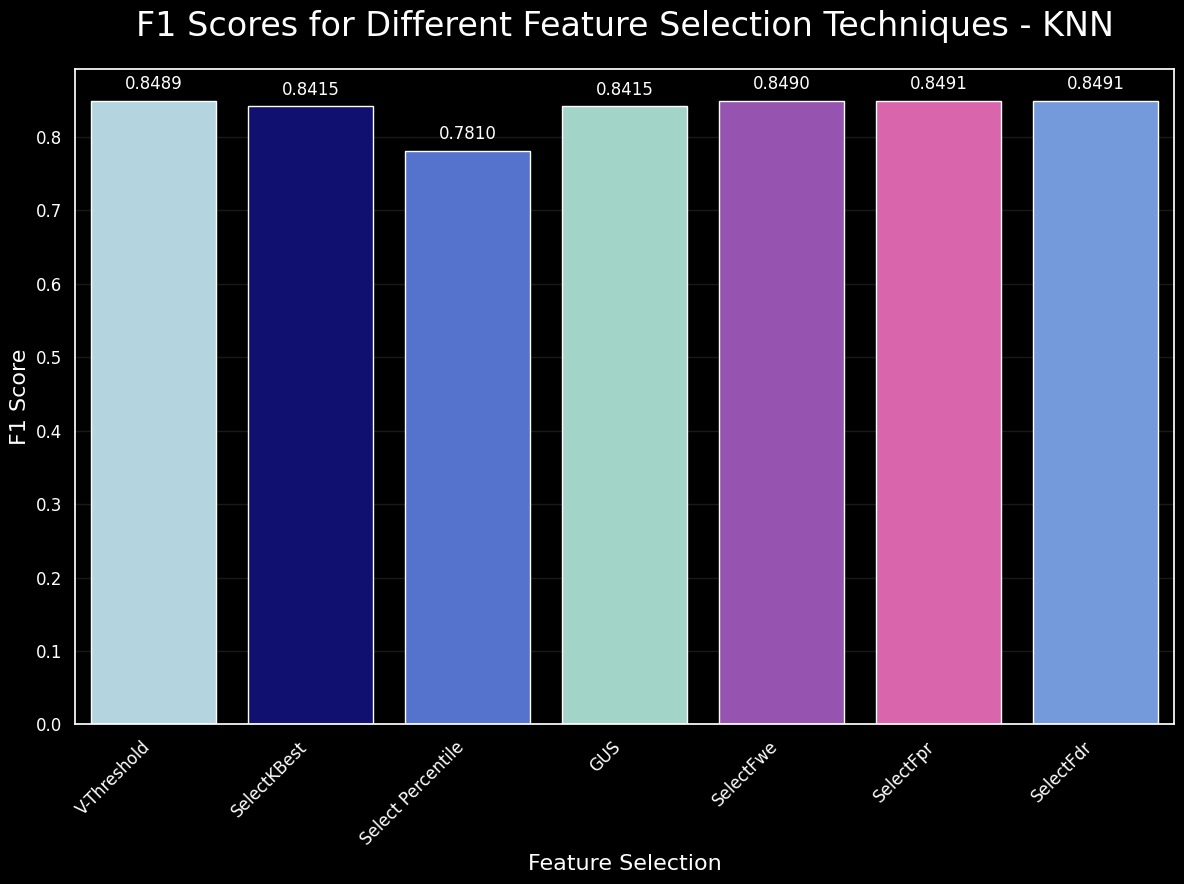

In [147]:
# Set custom bar colors
colors = ['lightblue', 'navy', 'royalblue', '#99DDCC', '#9D44C0', '#EC53B0', 'cornflowerblue', 'steelblue']

features_name = ['V-Threshold', 'SelectKBest', 'Select Percentile', 'GUS', 'SelectFwe', 'SelectFpr', 'SelectFdr']
f1_values = [var_KNNscore, K_KNNscore, P_KNNscore, GUS_KNNscore, Fwe_KNNscore, FPR_KNNscore, Fdr_KNNscore]

# Create a figure and axis with a black background
fig, ax = plt.subplots(figsize=(12, 9))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

ax = sns.barplot(x=features_name, y=f1_values, palette=colors)

# Set title and labels with white text
plt.title('F1 Scores for Different Feature Selection Techniques - KNN', color='white', fontsize=24, pad=24)
plt.xlabel('Feature Selection', color='white', fontsize=16)
plt.ylabel('F1 Score', color='white', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right", color='white', fontsize=12)
plt.yticks(color='white', fontsize=12)

# Add values above each bar with white color
for i, v in enumerate(f1_values):
    ax.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom', fontsize=12, color='white')

# Set axis line colors to white
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

plt.tight_layout()
plt.show()

**Feature Selection - DecisionTreeClassifier**

In [148]:
# Define the algorithms and their metrics
features = [
    ('VarianceThreshold', var_accuracy, var_precision, var_recall, var_score),
    ('SelectKBest', K_DTaccuracy, K_DTprecision, K_DTrecall, K_DTscore),
    ('SelectFromModel', sfm_accuracy, sfm_precision, sfm_recall, sfm_score),
    ('Recursive feature elimination', RFE_DTaccuracy, RFE_DTprecision, RFE_DTrecall, RFE_DTscore),
    ('Select Percentile', P_DTaccuracy, P_DTprecision, P_DTrecall, P_DTscore),
    ('Generic Univariate Select', GUS_DTaccuracy, GUS_DTprecision, GUS_DTrecall, GUS_DTscore),
    ('SelectFwe', Fwe_DTaccuracy, Fwe_DTprecision, Fwe_DTrecall, Fwe_DTscore),
    ('SelectFpr', FPR_DTaccuracy, FPR_DTprecision, FPR_DTrecall, FPR_DTscore),
    ('SelectFdr', Fdr_DTaccuracy, Fdr_DTprecision, Fdr_DTrecall, Fdr_DTscore)
]

# Create a DataFrame
df_feature = pd.DataFrame(features, columns=['Feature Selection', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Find the row with the maximum accuracy
max_F1_Score_row = df_feature[df_feature['F1-Score'] == df_feature['F1-Score'].max()]

# Create a style function to set the background color and font color
def highlight_max(s):
    bg_color = ['background-color: #03C988' if s.name == max_F1_Score_row.index[0] else 'background-color: black'] * len(s)
    font_color = 'color: white'
    border = 'border: 1px solid white;'
    return [f'{bg}; {font_color}; {border}' for bg in bg_color]

# Apply the style function to the DataFrame
styled_df = df_feature.style.apply(highlight_max, axis=1)

# Style the DataFrame to adjust font size and style
styled_df = styled_df.set_table_styles([{
    'selector': 'th',
    'props': [('font-size', '24px'), ('text-align', 'center'), ('font-weight', 'bold'), ('background-color', 'black'), ('color', 'darkblue'), ('border', '1px solid white')]
}, {
    'selector': 'td',
    'props': [('font-size', '18px'), ('text-align', 'center'), ('color', 'white')]
}])

# Display the styled DataFrame
styled_df

,Feature Selection,Accuracy,Precision,Recall,F1-Score
0,VarianceThreshold,0.883700,0.872435,0.883700,0.875127
1,SelectKBest,0.841685,0.837273,0.841685,0.838439
2,SelectFromModel,0.854716,0.852396,0.854716,0.852872
3,Recursive feature elimination,0.881081,0.868564,0.881081,0.871729
4,Select Percentile,0.829447,0.753289,0.829447,0.773715
5,Generic Univariate Select,0.872131,0.855416,0.872131,0.860137
6,SelectFwe,0.883639,0.872398,0.883639,0.875076
7,SelectFpr,0.883943,0.872529,0.883943,0.875270
8,SelectFdr,0.883943,0.872602,0.883943,0.875266


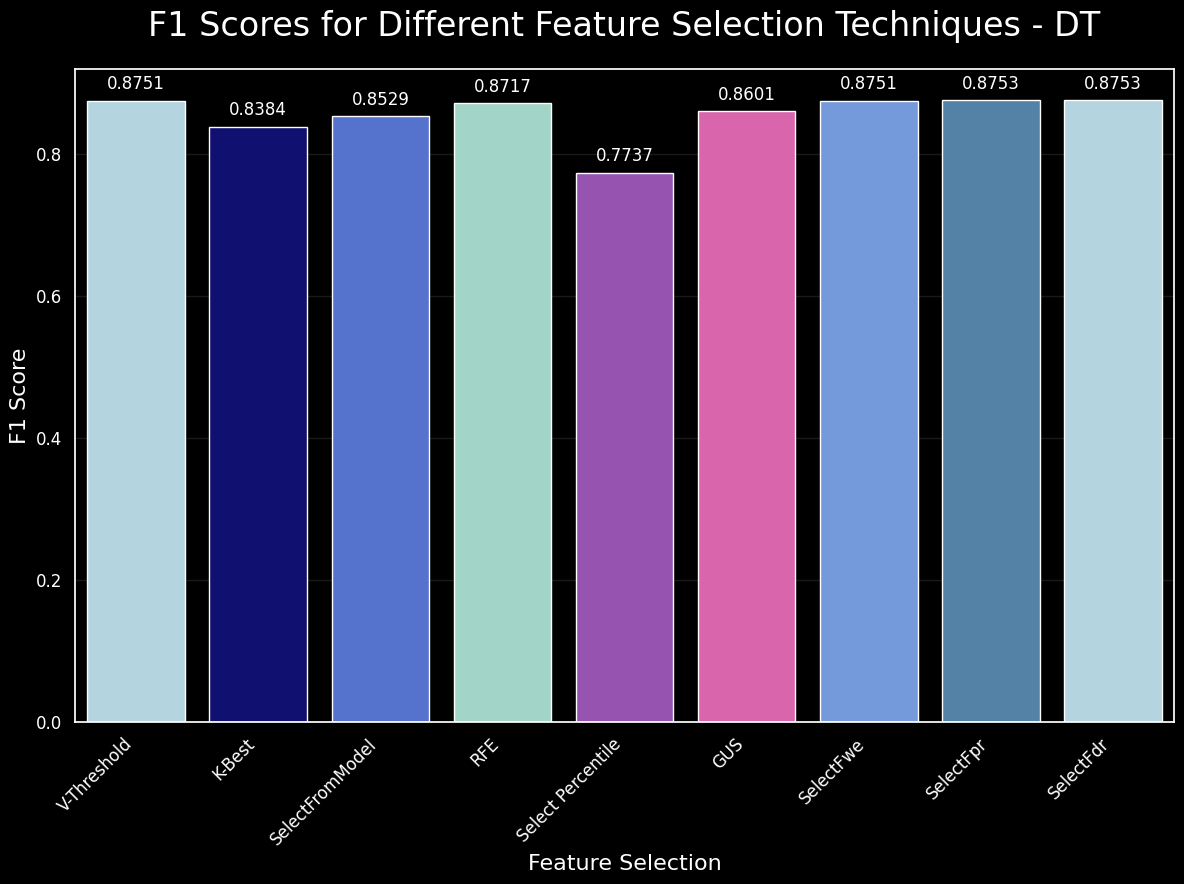

In [149]:
# Set custom bar colors
colors = ['lightblue', 'navy', 'royalblue', '#99DDCC', '#9D44C0', '#EC53B0', 'cornflowerblue', 'steelblue']

features_name = ['V-Threshold', 'K-Best', 'SelectFromModel', 'RFE', 'Select Percentile','GUS','SelectFwe','SelectFpr','SelectFdr']
f1_values = [var_score, K_DTscore, sfm_score, RFE_DTscore, P_DTscore, GUS_DTscore, Fwe_DTscore, FPR_DTscore, Fdr_DTscore]

# Create a figure and axis with a black background
fig, ax = plt.subplots(figsize=(12, 9))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

ax = sns.barplot(x=features_name, y=f1_values, palette=colors)

# Set title and labels with white text
plt.title('F1 Scores for Different Feature Selection Techniques - DT', color='white', fontsize=24, pad=24)
plt.xlabel('Feature Selection', color='white', fontsize=16)
plt.ylabel('F1 Score', color='white', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right", color='white', fontsize=12)
plt.yticks(color='white', fontsize=12)

# Add values above each bar with white color
for i, v in enumerate(f1_values):
    ax.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom', fontsize=12, color='white')

# Set axis line colors to white
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

plt.tight_layout()
plt.show()

**KNN**

**Comparison of using the feature selection and without using it / KNN**

In [150]:
# Create a dictionary with the metrics values
data = {
    'Metrics': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'KNN With VarianceThreshold': [var_KNNaccuracy, var_KNNprecision, var_KNNrecall, var_KNNscore],
    'KNN Without VarianceThreshold': [knn_accuracy, knn_precision, knn_recall, knn_f1_score]
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Set 'Metrics' as the index
df.set_index('Metrics', inplace=True)

# Display the DataFrame
print(df)

           KNN With VarianceThreshold  KNN Without VarianceThreshold
Metrics                                                             
Accuracy                     0.861353                       0.861170
Precision                    0.843921                       0.843693
Recall                       0.861353                       0.861170
F1-Score                     0.848901                       0.848713


In [151]:
features = [
    ('KNN With VarianceThreshold', var_KNNaccuracy, var_KNNprecision, var_KNNrecall, var_KNNscore),
    ('KNN Without VarianceThreshold', knn_accuracy, knn_precision, knn_recall, knn_f1_score)
]

# Create a DataFrame
df_feature = pd.DataFrame(features, columns=['K-Nearest Neighbours (KNN)', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Find the row with the maximum accuracy
max_F1_Score_row = df_feature[df_feature['F1-Score'] == df_feature['F1-Score'].max()]

# Create a style function to set the background color and font color
def highlight_max(s):
    bg_color = ['background-color: #03C988' if s.name == max_F1_Score_row.index[0] else 'background-color: black'] * len(s)
    font_color = 'color: white'
    border = 'border: 1px solid white;'
    return [f'{bg}; {font_color}; {border}' for bg in bg_color]

# Apply the style function to the DataFrame
styled_df = df_feature.style.apply(highlight_max, axis=1)

# Style the DataFrame to adjust font size and style
styled_df = styled_df.set_table_styles([{
    'selector': 'th',
    'props': [('font-size', '24px'), ('text-align', 'center'), ('font-weight', 'bold'), ('background-color', 'black'), ('color', 'darkblue'), ('border', '1px solid white')]
}, {
    'selector': 'td',
    'props': [('font-size', '18px'), ('text-align', 'center'), ('color', 'white')]
}])

# Display the styled DataFrame
styled_df

,K-Nearest Neighbours (KNN),Accuracy,Precision,Recall,F1-Score
0,KNN With VarianceThreshold,0.861353,0.843921,0.861353,0.848901
1,KNN Without VarianceThreshold,0.861170,0.843693,0.861170,0.848713


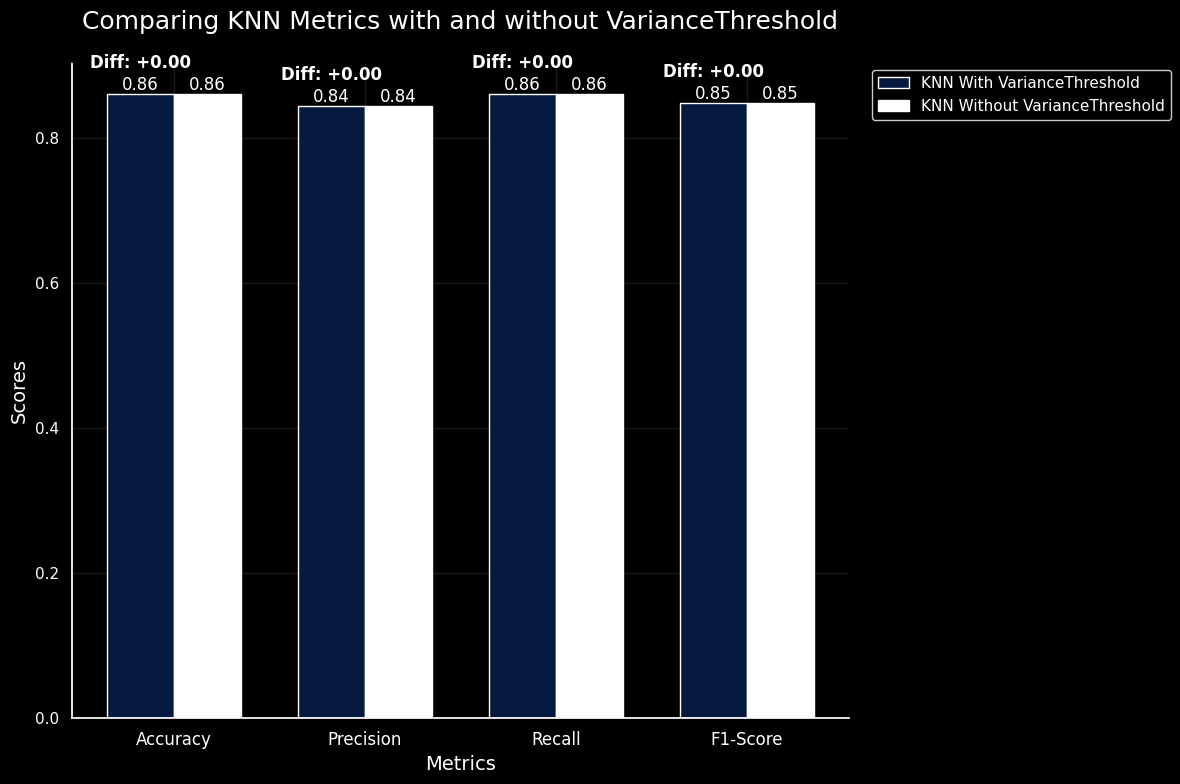

In [152]:
# Create a dictionary with the metrics values
data = {
    'Metrics': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'KNN With VarianceThreshold': [var_KNNaccuracy, var_KNNprecision, var_KNNrecall, var_KNNscore],
    'KNN Without VarianceThreshold': [knn_accuracy, knn_precision, knn_recall, knn_f1_score]
}

# Calculate the differences between the two cases
data['Difference'] = np.array(data['KNN With VarianceThreshold']) - np.array(data['KNN Without VarianceThreshold'])

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
index = np.arange(len(data['Metrics']))

# Create a figure and axis with a black background
fig, ax = plt.subplots(figsize=(12, 8))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

colors = ['#061A40', '#FFFFFF']

# Create bars for both cases with the custom color scheme
bars_with = ax.bar(index, data['KNN With VarianceThreshold'], bar_width, label='KNN With VarianceThreshold', color=colors[0])
bars_without = ax.bar(index + bar_width, data['KNN Without VarianceThreshold'], bar_width, label='KNN Without VarianceThreshold', color=colors[1])

# Set the labels, title, and legend with white text
ax.set_xlabel('Metrics', color='white', fontsize=14)
ax.set_ylabel('Scores', color='white', fontsize=14)
ax.set_title('Comparing KNN Metrics with and without VarianceThreshold', color='white', fontsize=18, pad=24)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(data['Metrics'], color='white', fontsize=12)

# Add data labels for the bars and differences with white text
for i, bar in enumerate(bars_with):
    height_with = bar.get_height()
    height_without = bars_without[i].get_height()
    difference = data['Difference'][i]
    ax.annotate(f'{height_with:.2f}', (bar.get_x() + bar.get_width() / 2, height_with),
                ha='center', va='bottom', fontsize=12, color='white')
    ax.annotate(f'{height_without:.2f}', (bar.get_x() + bar.get_width() / 2 + bar_width, height_without),
                ha='center', va='bottom', fontsize=12, color='white')
    # Place difference values closer to the bars and in bold with white text
    ax.annotate(f'Diff: {difference:+.2f}', (bar.get_x() + bar.get_width() / 2, max(height_with, height_without) + 0.03),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='white')

# Move the legend outside the plot with white text
ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1), facecolor='black', edgecolor='white', labelcolor='white')

# Show x and y axes with white text
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Show the chart
plt.tight_layout()
plt.show()

**DT**

**Comparison of using the feature selection and without using it / DT**

In [153]:
# Create a dictionary with the metrics values
data = {
    'Metrics': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'DT with SelectFwe': [Fwe_DTaccuracy, Fwe_DTprecision, Fwe_DTrecall, Fwe_DTscore],
    'DT Without SelectFwe': [DT_accuracy, DT_precision, DT_recall, DT_score]
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Set 'Metrics' as the index
df.set_index('Metrics', inplace=True)

# Display the DataFrame
print(df)

           DT with SelectFwe  DT Without SelectFwe
Metrics                                           
Accuracy            0.883639              0.844791
Precision           0.872398              0.845921
Recall              0.883639              0.844791
F1-Score            0.875076              0.844539


In [154]:
features = [
    ('DT with SelectFwe', Fwe_DTaccuracy, Fwe_DTprecision, Fwe_DTrecall, Fwe_DTscore),
    ('DT Without SelectFwe', DT_accuracy, DT_precision, DT_recall, DT_score)
]

# Create a DataFrame
df_feature = pd.DataFrame(features, columns=['Decision Tree Classification (DT)', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Find the row with the maximum accuracy
max_accuracy_row = df_feature[df_feature['Accuracy'] == df_feature['Accuracy'].max()]

# Create a style function to set the background color and font color
def highlight_max(s):
    bg_color = ['background-color: #03C988' if s.name == max_accuracy_row.index[0] else 'background-color: black'] * len(s)
    font_color = 'color: white'
    border = 'border: 1px solid white;'
    return [f'{bg}; {font_color}; {border}' for bg in bg_color]

# Apply the style function to the DataFrame
styled_df = df_feature.style.apply(highlight_max, axis=1)

# Style the DataFrame to adjust font size and style
styled_df = styled_df.set_table_styles([{
    'selector': 'th',
    'props': [('font-size', '24px'), ('text-align', 'center'), ('font-weight', 'bold'), ('background-color', 'black'), ('color', 'darkblue'), ('border', '1px solid white')]
}, {
    'selector': 'td',
    'props': [('font-size', '18px'), ('text-align', 'center'), ('color', 'white')]
}])

# Display the styled DataFrame
styled_df

,Decision Tree Classification (DT),Accuracy,Precision,Recall,F1-Score
0,DT with SelectFwe,0.883639,0.872398,0.883639,0.875076
1,DT Without SelectFwe,0.844791,0.845921,0.844791,0.844539


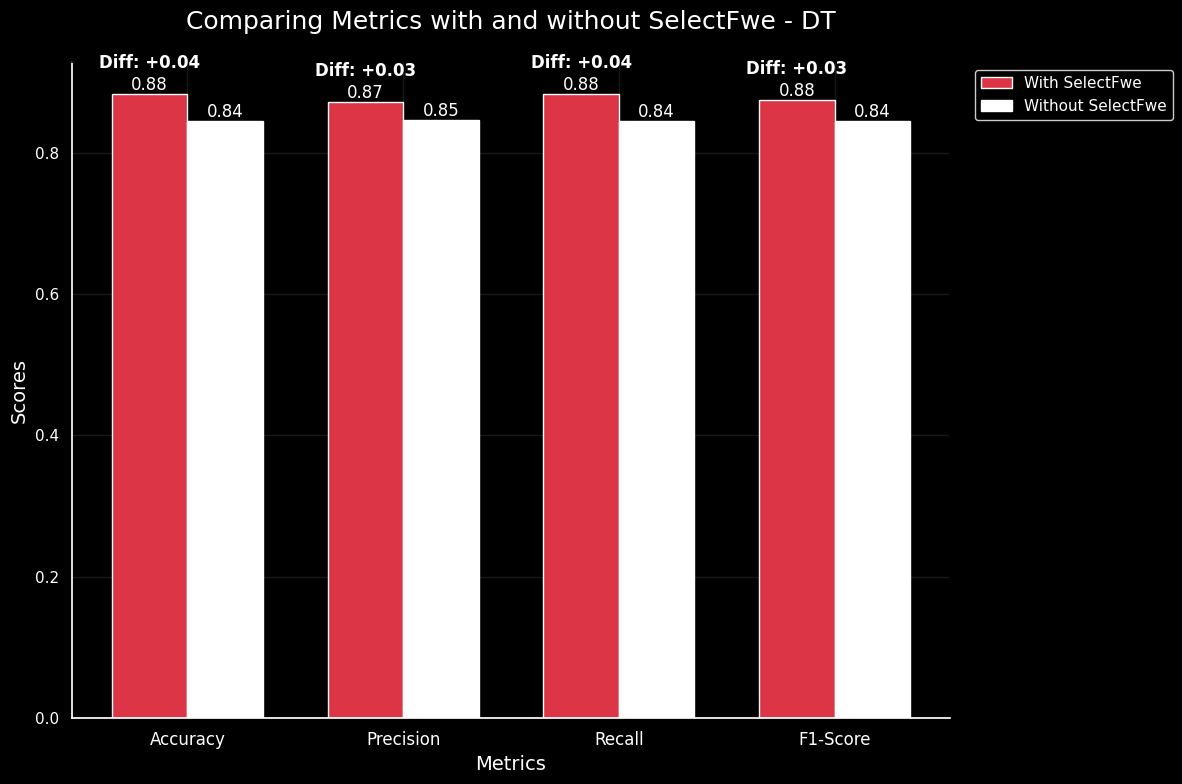

In [155]:
# Create a dictionary with the metric values
data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'With SelectFwe': [Fwe_DTaccuracy, Fwe_DTprecision, Fwe_DTrecall, Fwe_DTscore],
    'Without SelectFwe': [DT_accuracy, DT_precision, DT_recall, DT_score]
}

# Calculate the differences between the two cases
data['Difference'] = np.array(data['With SelectFwe']) - np.array(data['Without SelectFwe'])

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
index = np.arange(len(data['Metric']))

# Create a figure and axis with a black background
fig, ax = plt.subplots(figsize=(12, 8))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

# Define a custom color scheme with red (#dc3545) and white (#FFFFFF)
colors = ['#dc3545', '#FFFFFF']

# Create bars for both cases with the custom color scheme
bars_with = ax.bar(index, data['With SelectFwe'], bar_width, label='With SelectFwe', color=colors[0])
bars_without = ax.bar(index + bar_width, data['Without SelectFwe'], bar_width, label='Without SelectFwe', color=colors[1])

# Set the labels, title, and legend with white text
ax.set_xlabel('Metrics', color='white', fontsize=14)
ax.set_ylabel('Scores', color='white', fontsize=14)
ax.set_title('Comparing Metrics with and without SelectFwe - DT', color='white', fontsize=18, pad=24)  # Increased title font size and padding
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(data['Metric'], color='white', fontsize=12)

# Add data labels for the bars and differences with white text
for i, bar in enumerate(bars_with):
    height_with = bar.get_height()
    height_without = bars_without[i].get_height()
    difference = data['Difference'][i]
    ax.annotate(f'{height_with:.2f}', (bar.get_x() + bar.get_width() / 2, height_with),
                ha='center', va='bottom', fontsize=12, color='white')
    ax.annotate(f'{height_without:.2f}', (bar.get_x() + bar.get_width() / 2 + bar_width, height_without),
                ha='center', va='bottom', fontsize=12, color='white')
    # Place difference values closer to the bars and in bold with white text
    ax.annotate(f'Diff: {difference:+.2f}', (bar.get_x() + bar.get_width() / 2, max(height_with, height_without) + 0.03),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='white')

# Move the legend outside the plot with white text
ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1), facecolor='black', edgecolor='white', labelcolor='white')

# Show x and y axes with white text
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Show the chart
plt.tight_layout()
plt.show()

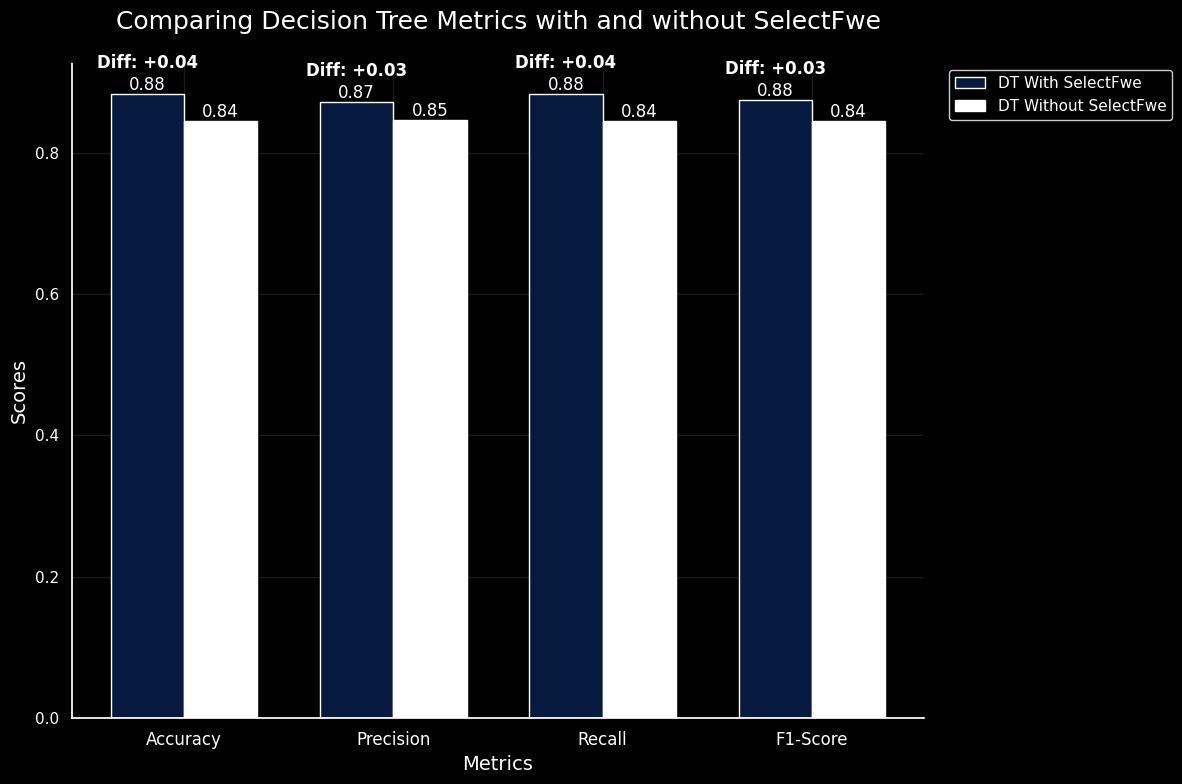

In [156]:
# Create a dictionary with the metric values
data = {
    'Metrics': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'DT With SelectFwe': [Fwe_DTaccuracy, Fwe_DTprecision, Fwe_DTrecall, Fwe_DTscore],
    'DT Without SelectFwe': [DT_accuracy, DT_precision, DT_recall, DT_score]
}

# Calculate the differences between the two cases
data['Difference'] = np.array(data['DT With SelectFwe']) - np.array(data['DT Without SelectFwe'])

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
index = np.arange(len(data['Metrics']))

# Create a figure and axis with a black background
fig, ax = plt.subplots(figsize=(12, 8))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

colors = ['#061A40', '#FFFFFF']

# Create bars for both cases with the custom color scheme
bars_with = ax.bar(index, data['DT With SelectFwe'], bar_width, label='DT With SelectFwe', color=colors[0])
bars_without = ax.bar(index + bar_width, data['DT Without SelectFwe'], bar_width, label='DT Without SelectFwe', color=colors[1])

# Set the labels, title, and legend with white text
ax.set_xlabel('Metrics', color='white', fontsize=14)
ax.set_ylabel('Scores', color='white', fontsize=14)
ax.set_title('Comparing Decision Tree Metrics with and without SelectFwe', color='white', fontsize=18, pad=24)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(data['Metrics'], color='white', fontsize=12)

# Add data labels for the bars and differences with white text
for i, bar in enumerate(bars_with):
    height_with = bar.get_height()
    height_without = bars_without[i].get_height()
    difference = data['Difference'][i]
    ax.annotate(f'{height_with:.2f}', (bar.get_x() + bar.get_width() / 2, height_with),
                ha='center', va='bottom', fontsize=12, color='white')
    ax.annotate(f'{height_without:.2f}', (bar.get_x() + bar.get_width() / 2 + bar_width, height_without),
                ha='center', va='bottom', fontsize=12, color='white')
    # Place difference values closer to the bars and in bold with white text
    ax.annotate(f'Diff: {difference:+.2f}', (bar.get_x() + bar.get_width() / 2, max(height_with, height_without) + 0.03),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='white')

# Move the legend outside the plot with white text
ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1), facecolor='black', edgecolor='white', labelcolor='white')

# Show x and y axes with white text
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Show the chart
plt.tight_layout()
plt.show()

In [157]:
features = [
    ('DT With With SelectFwe', Fwe_DTaccuracy, Fwe_DTprecision, Fwe_DTrecall, Fwe_DTscore),
    ('KNN With VarianceThreshold', var_KNNaccuracy, var_KNNprecision, var_KNNrecall, var_KNNscore)
]

# Create a DataFrame
df_feature = pd.DataFrame(features, columns=['Models', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Find the row with the maximum accuracy
max_accuracy_row = df_feature[df_feature['Accuracy'] == df_feature['Accuracy'].max()]

# Create a style function to set the background color and font color
def highlight_max(s):
    bg_color = ['background-color: #03C988' if s.name == max_accuracy_row.index[0] else 'background-color: black'] * len(s)
    font_color = 'color: white'
    border = 'border: 1px solid white;'
    return [f'{bg}; {font_color}; {border}' for bg in bg_color]

# Apply the style function to the DataFrame
styled_df = df_feature.style.apply(highlight_max, axis=1)

# Style the DataFrame to adjust font size and style
styled_df = styled_df.set_table_styles([{
    'selector': 'th',
    'props': [('font-size', '24px'), ('text-align', 'center'), ('font-weight', 'bold'), ('background-color', 'black'), ('color', 'darkblue'), ('border', '1px solid white')]
}, {
    'selector': 'td',
    'props': [('font-size', '18px'), ('text-align', 'center'), ('color', 'white')]
}])

# Display the styled DataFrame
styled_df

,Models,Accuracy,Precision,Recall,F1-Score
0,DT With With SelectFwe,0.883639,0.872398,0.883639,0.875076
1,KNN With VarianceThreshold,0.861353,0.843921,0.861353,0.848901


so Best Model results is DT with SelectFwe